adding ticker
AMTD
/////////////
adding ticker
BND
/////////////
adding ticker
DBX
/////////////
adding ticker
EMB
/////////////
adding ticker
IEF
/////////////
adding ticker
IGSB
/////////////
adding ticker
INO
/////////////
adding ticker
KHC
/////////////
adding ticker
NLOK
/////////////
adding ticker
PEP
/////////////
adding ticker
SHY
/////////////
adding ticker
TLT
/////////////
adding ticker
USIG
/////////////
adding ticker
WUBA
/////////////
adding ticker
ABBV
/////////////
adding ticker
AEP
/////////////
adding ticker
BSX
/////////////
adding ticker
COG
/////////////
adding ticker
CPB
/////////////
adding ticker
CPRI
/////////////
adding ticker
CNC
/////////////
adding ticker
CNP
/////////////
adding ticker
BMY
/////////////
adding ticker
CCXX
/////////////
adding ticker
CFG
/////////////
adding ticker
KO
/////////////
adding ticker
DB
/////////////
adding ticker
AG
/////////////
adding ticker
HOG
/////////////
adding ticker
PEAK
/////////////
adding ticker
IVZ
/////////////
ad

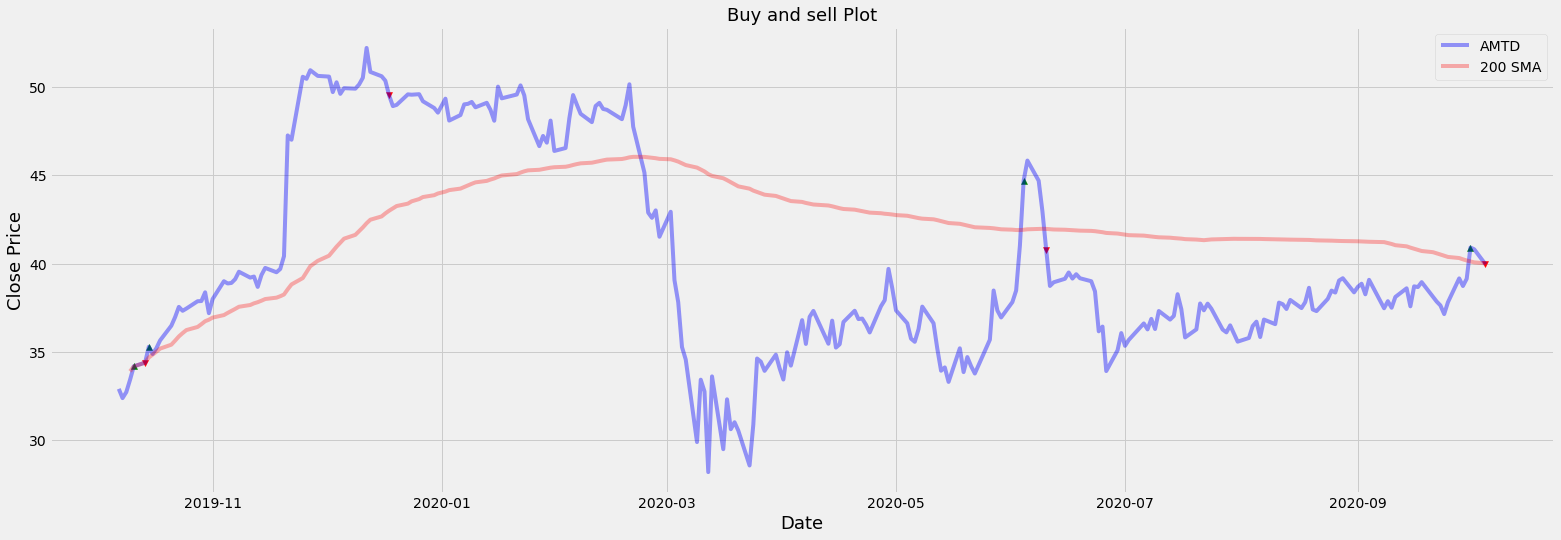

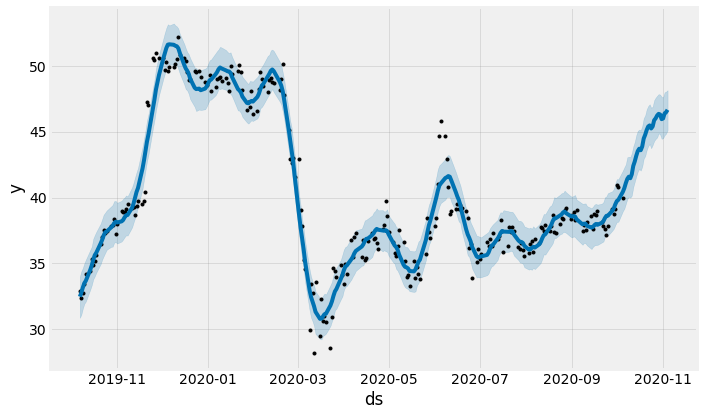

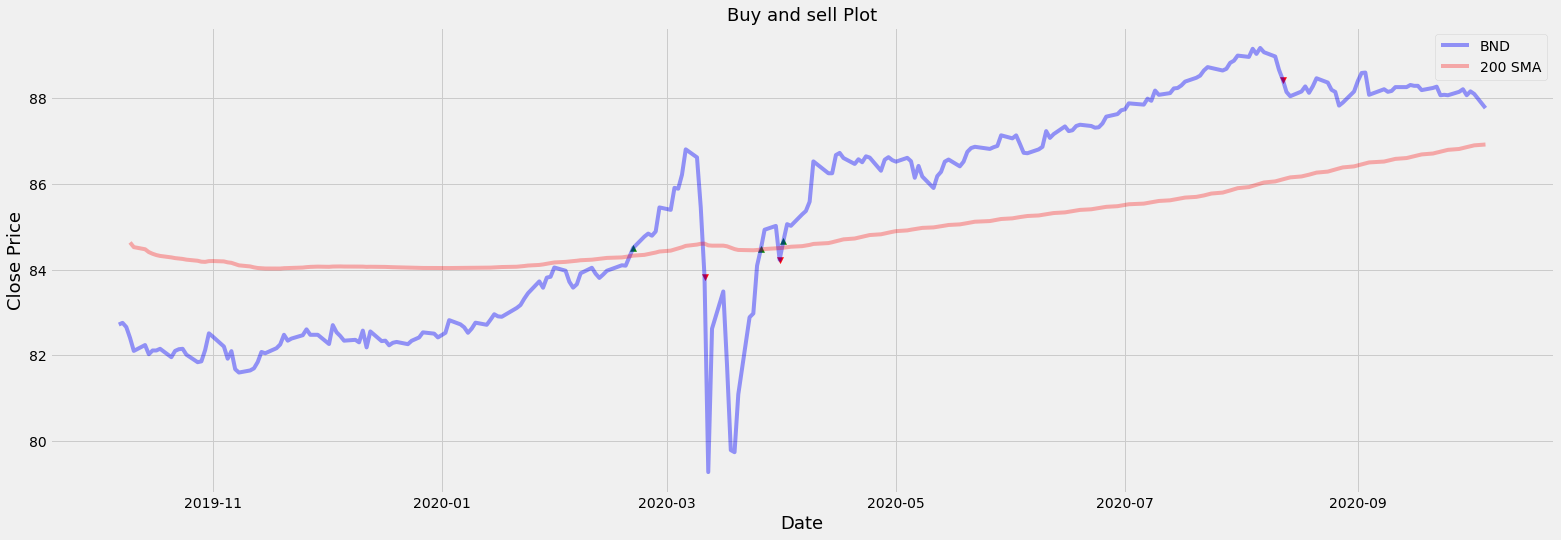

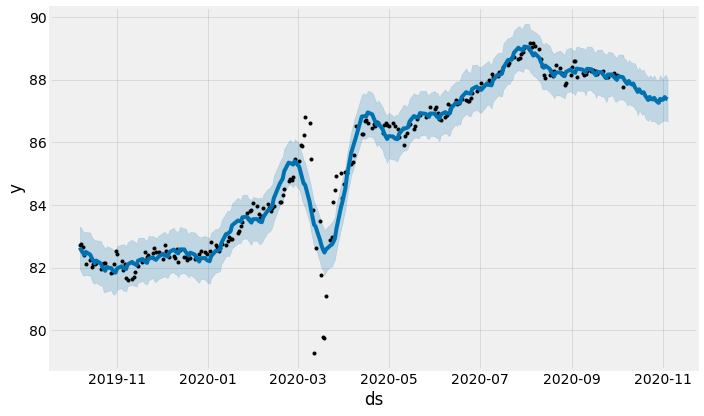

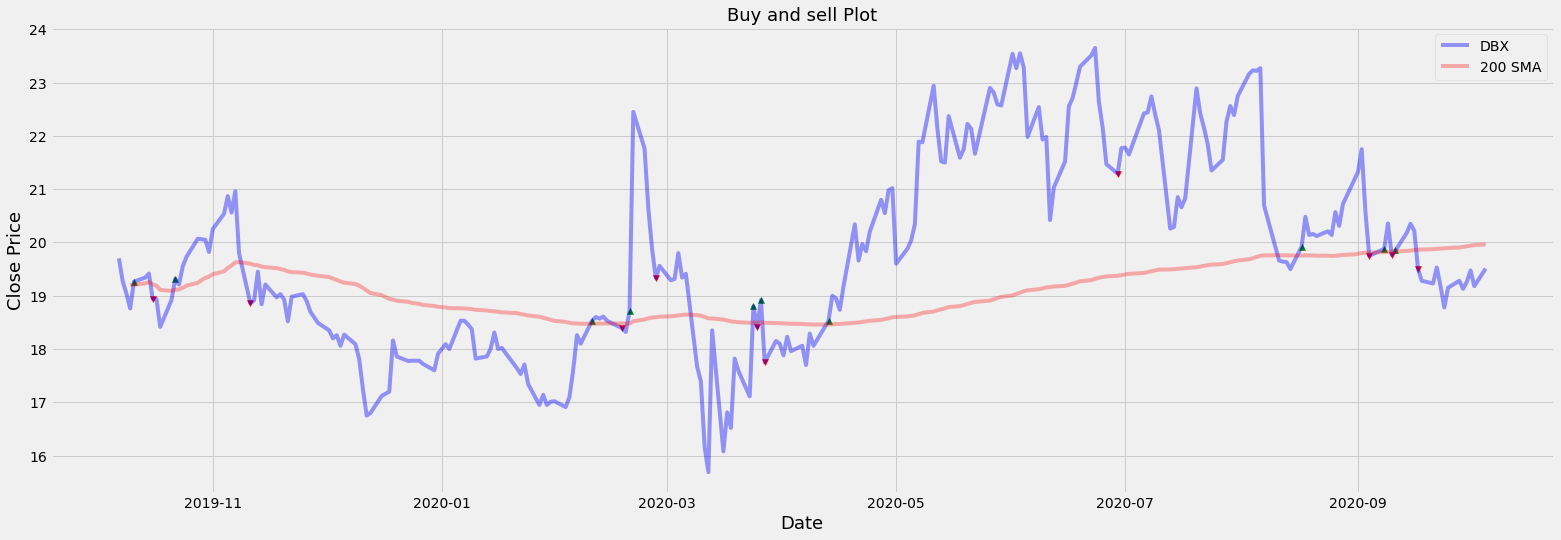

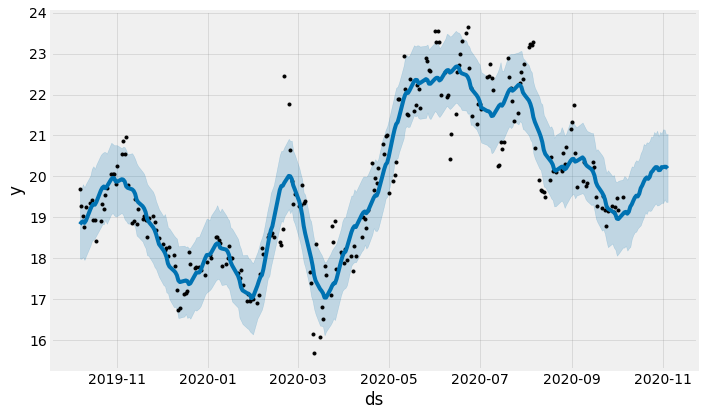

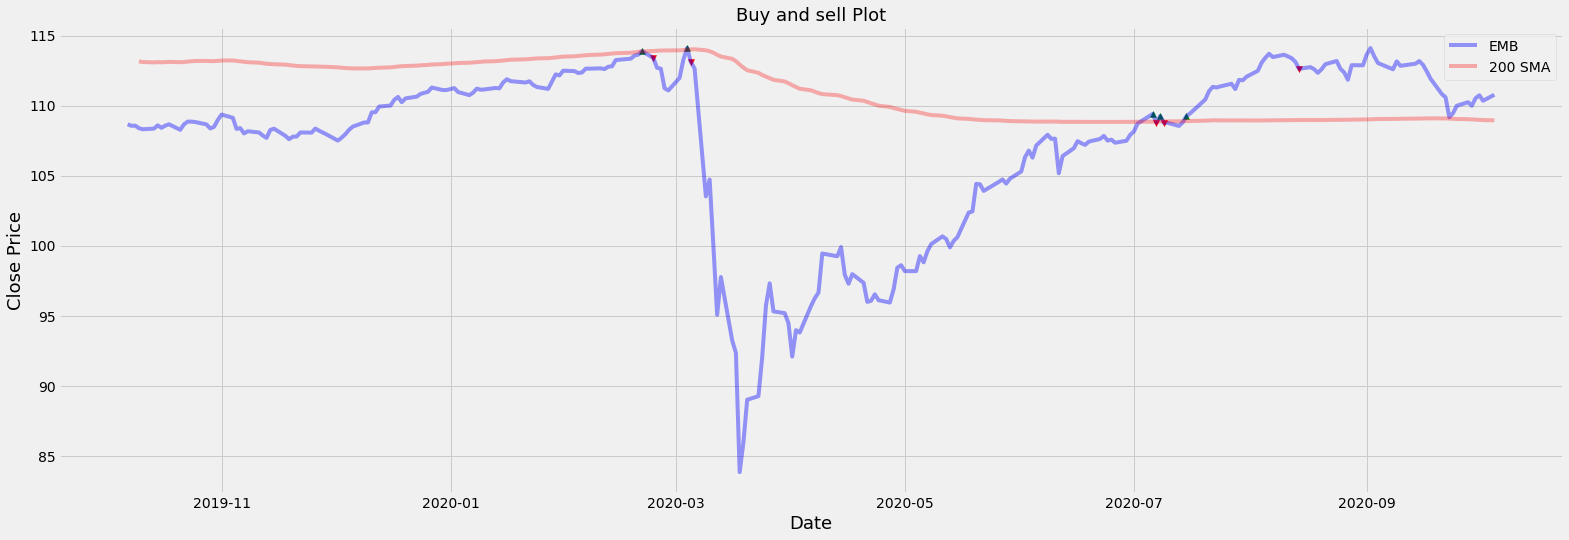

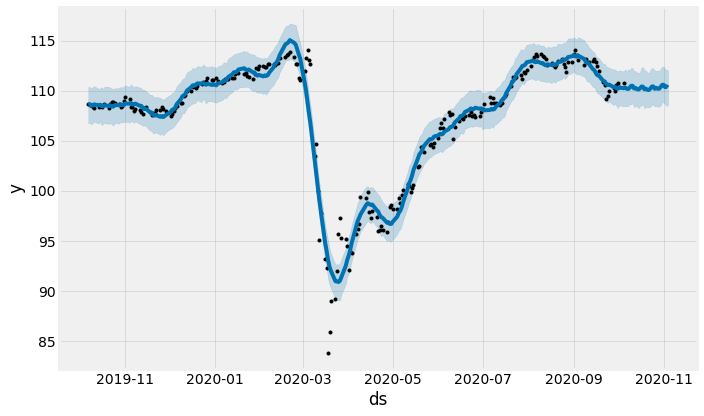

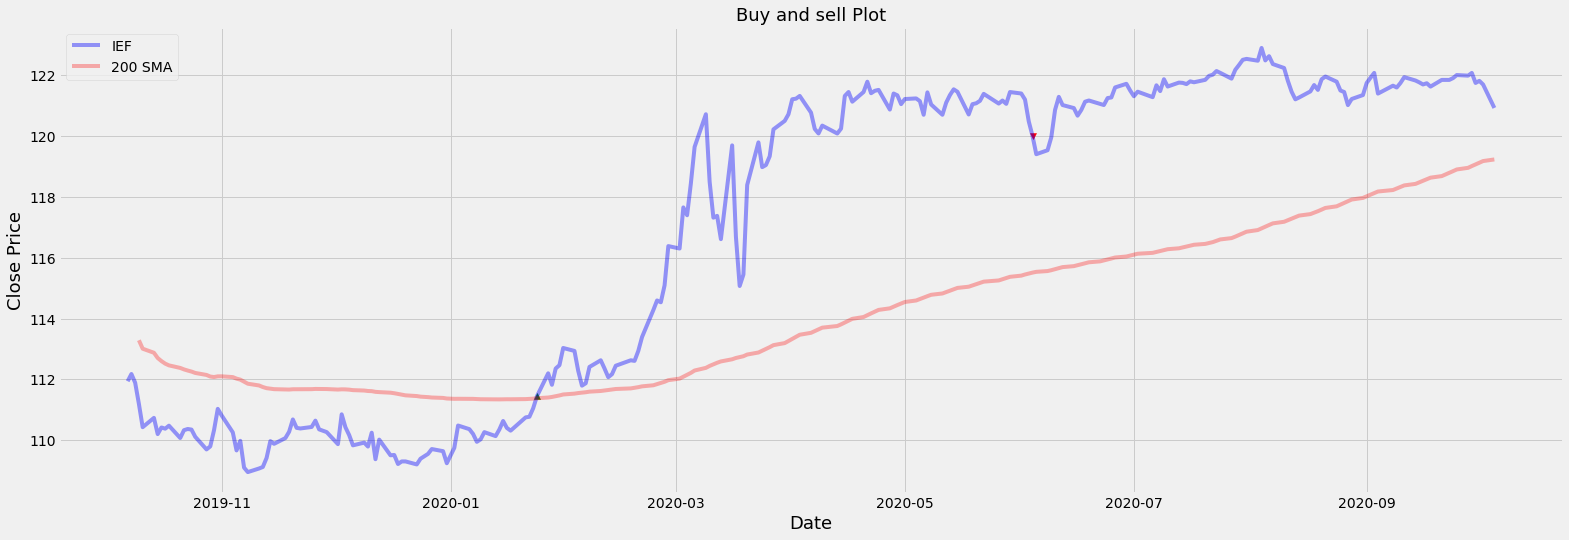

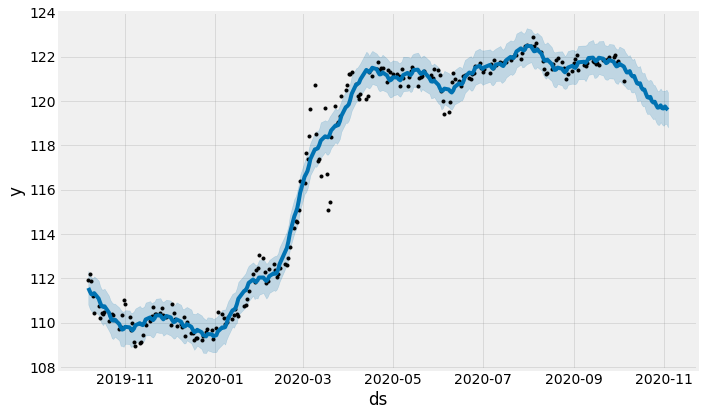

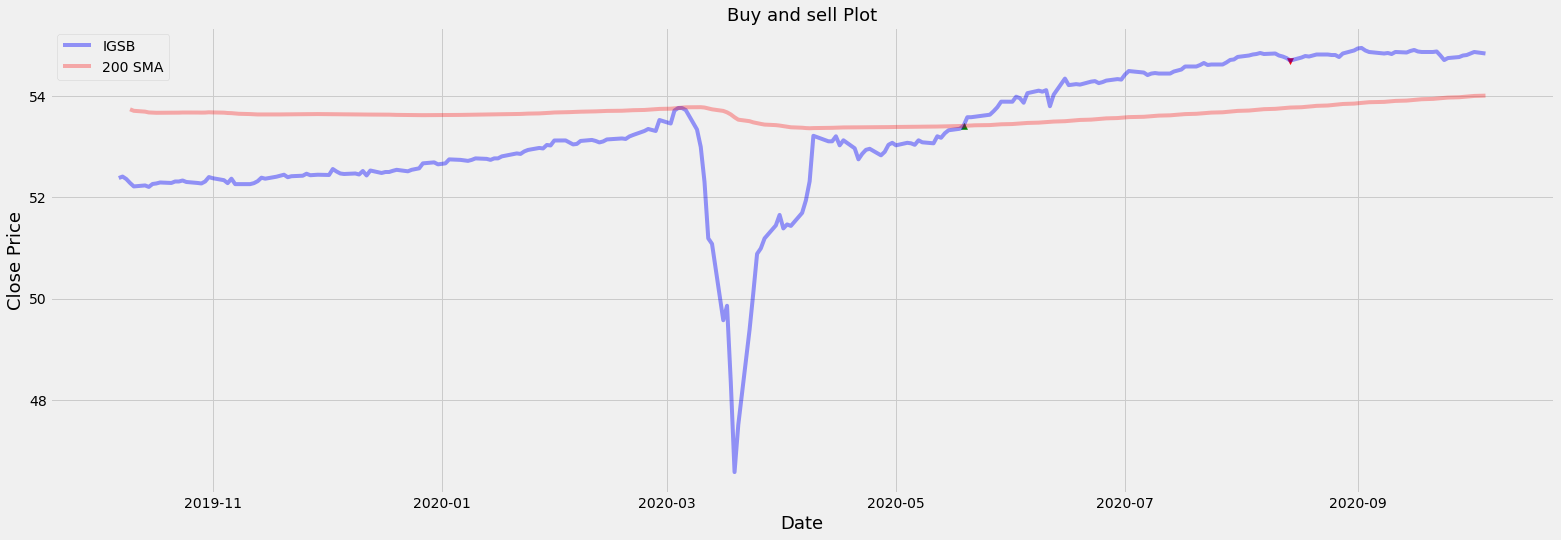

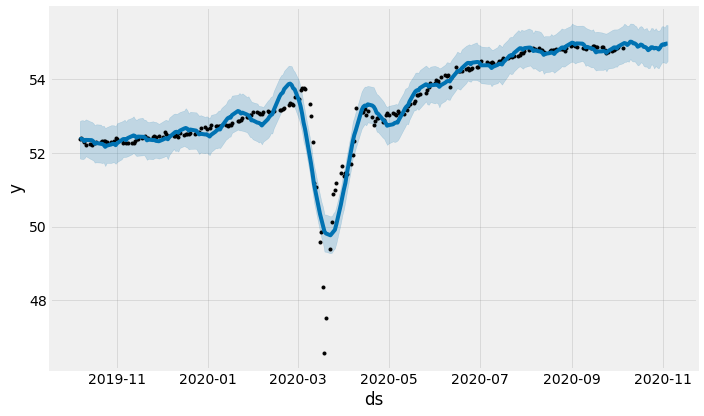

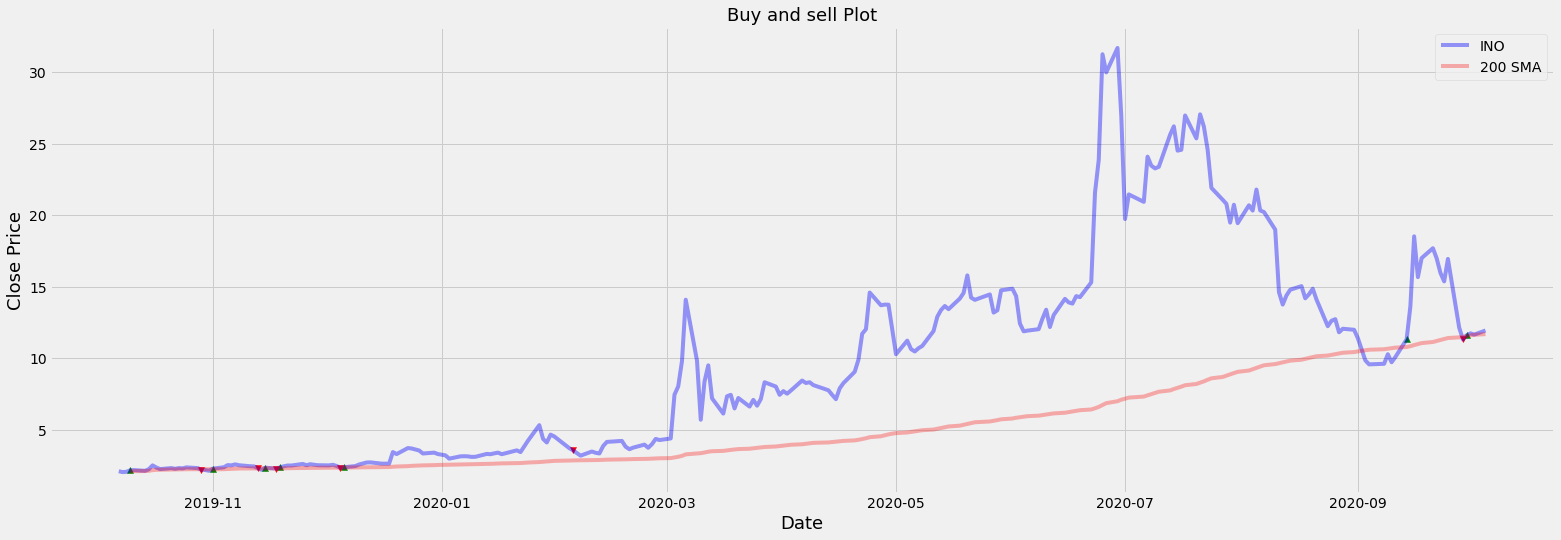

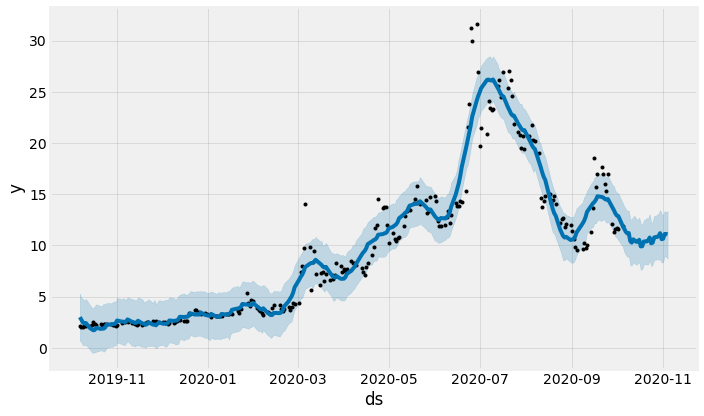

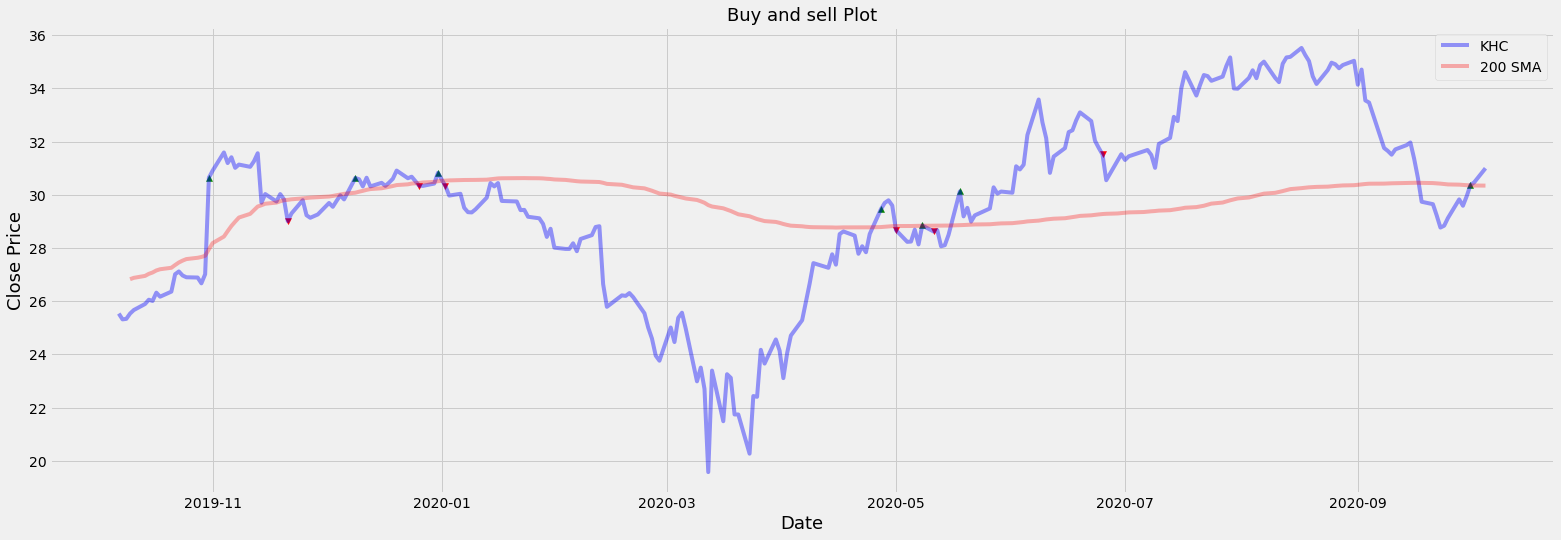

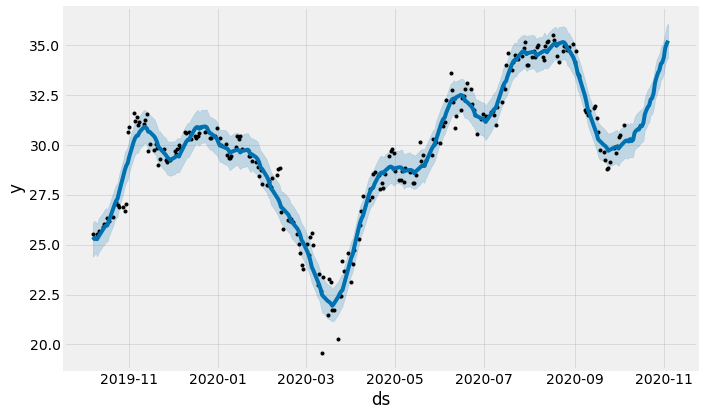

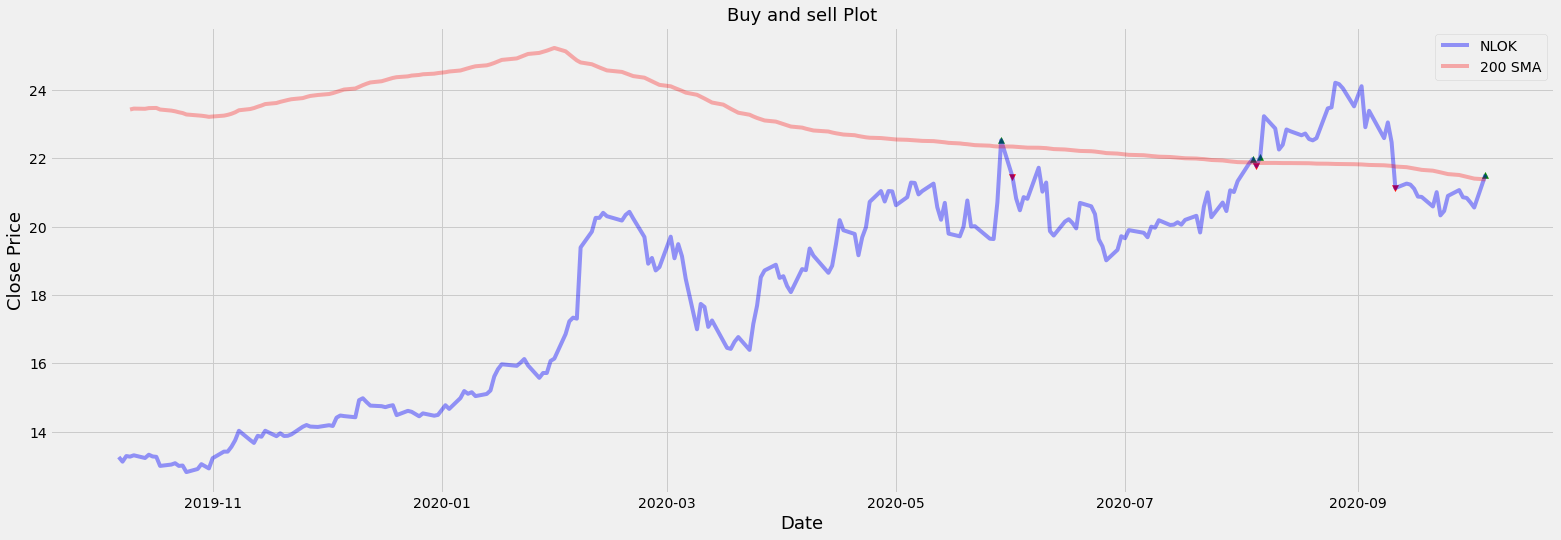

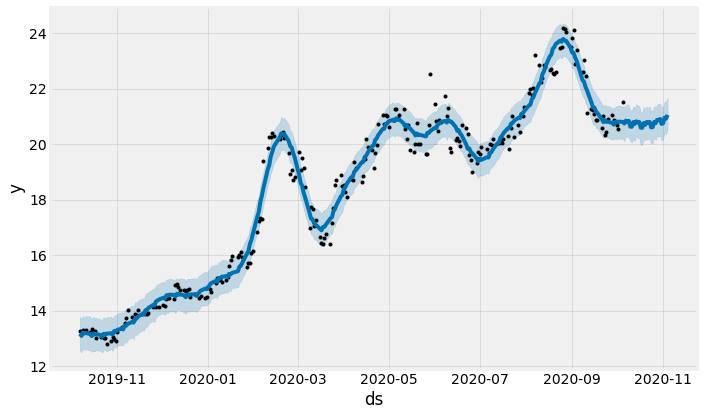

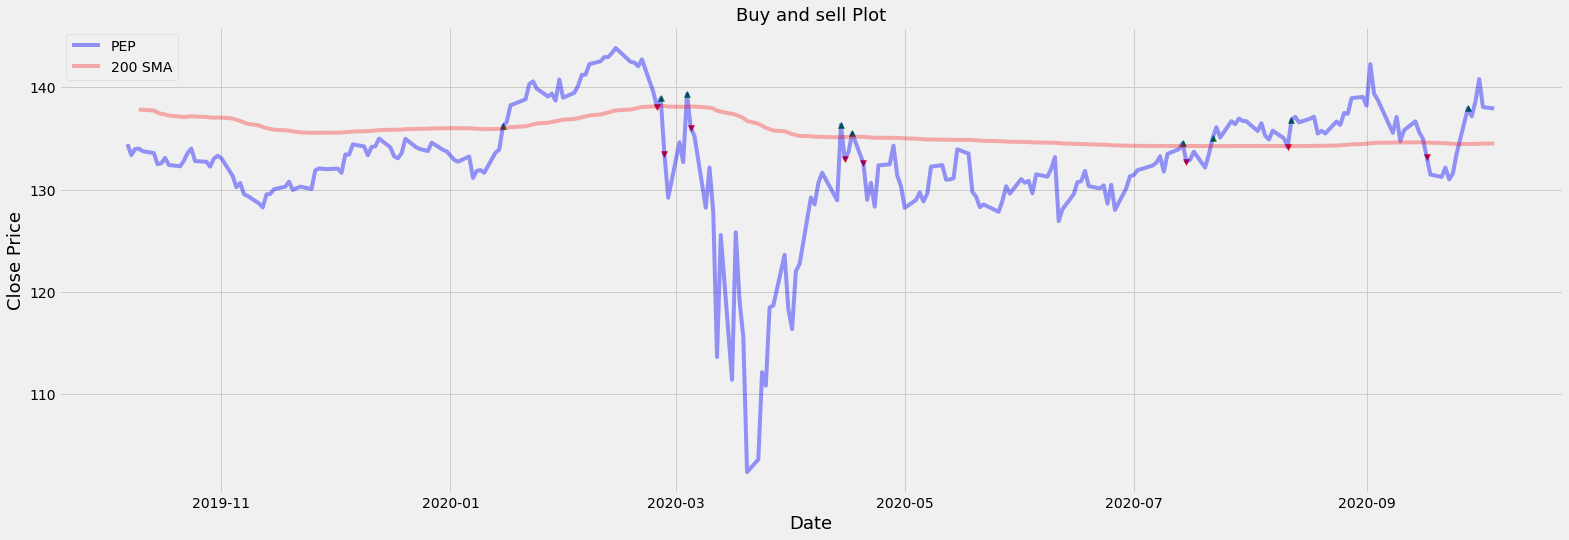

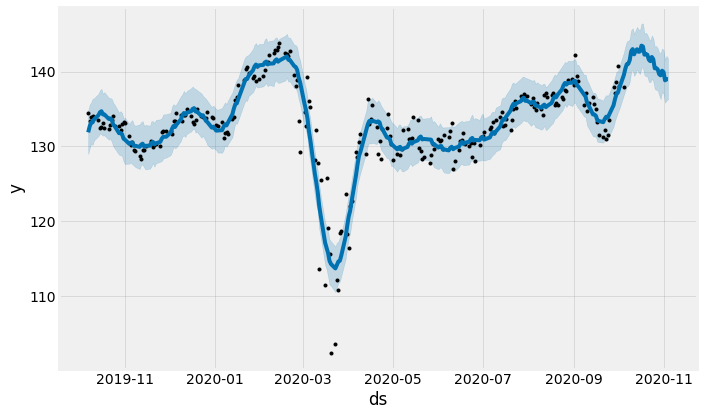

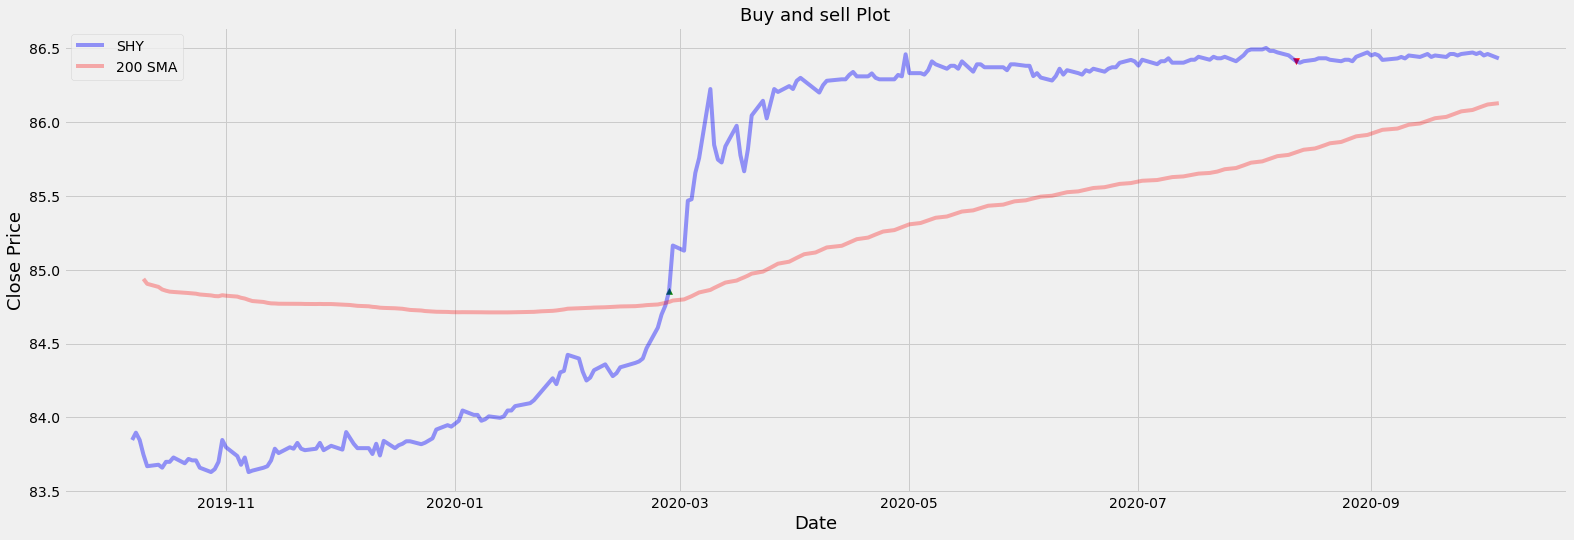

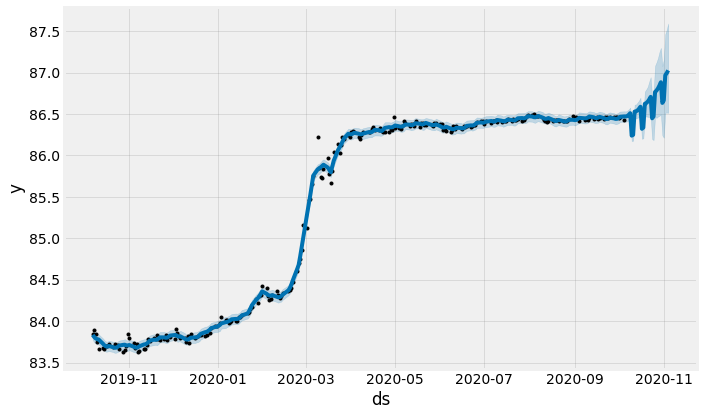

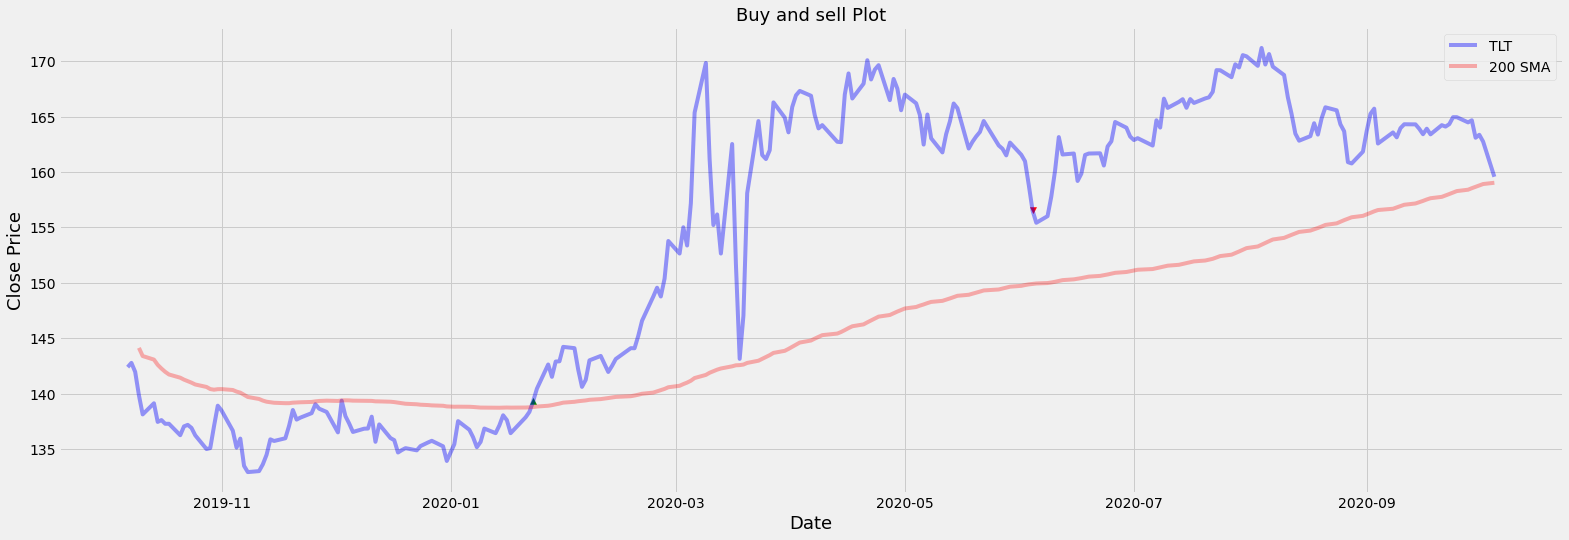

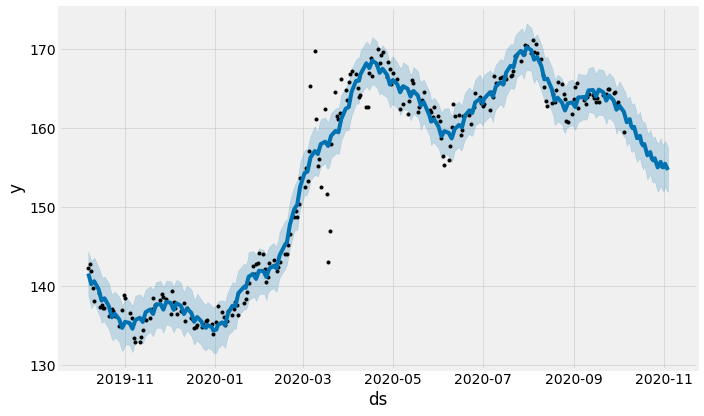

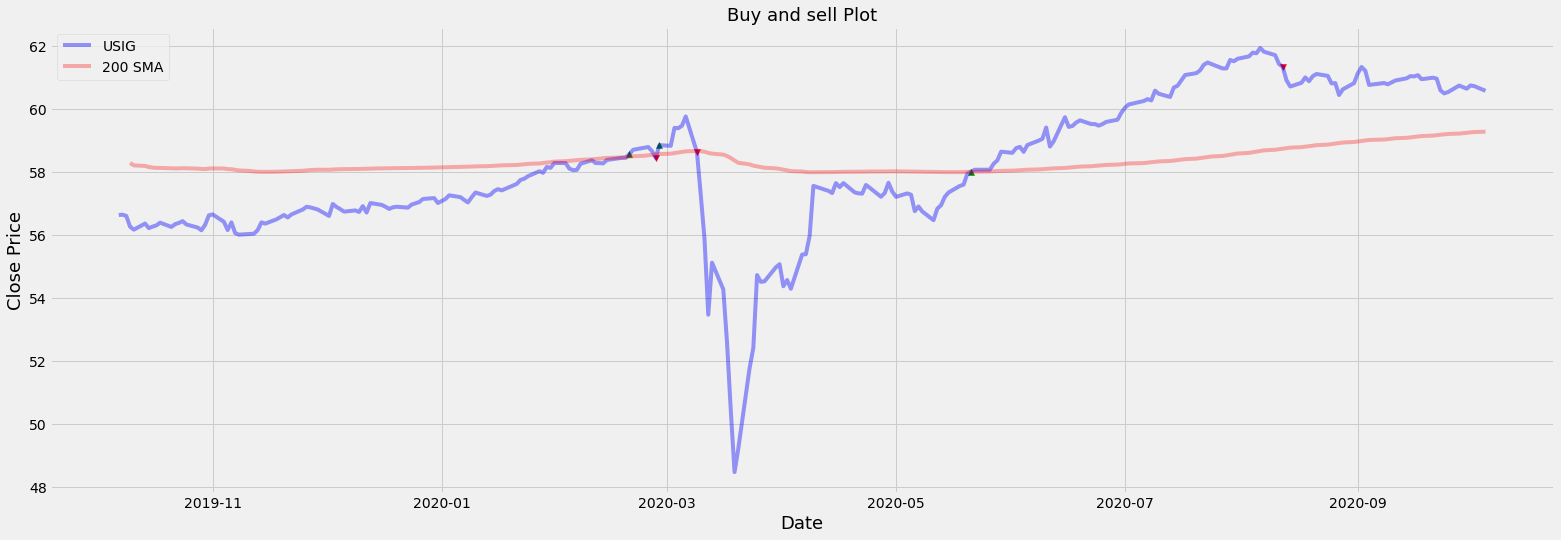

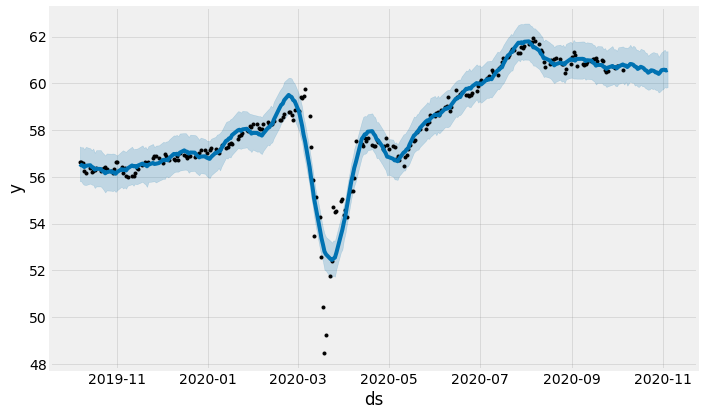

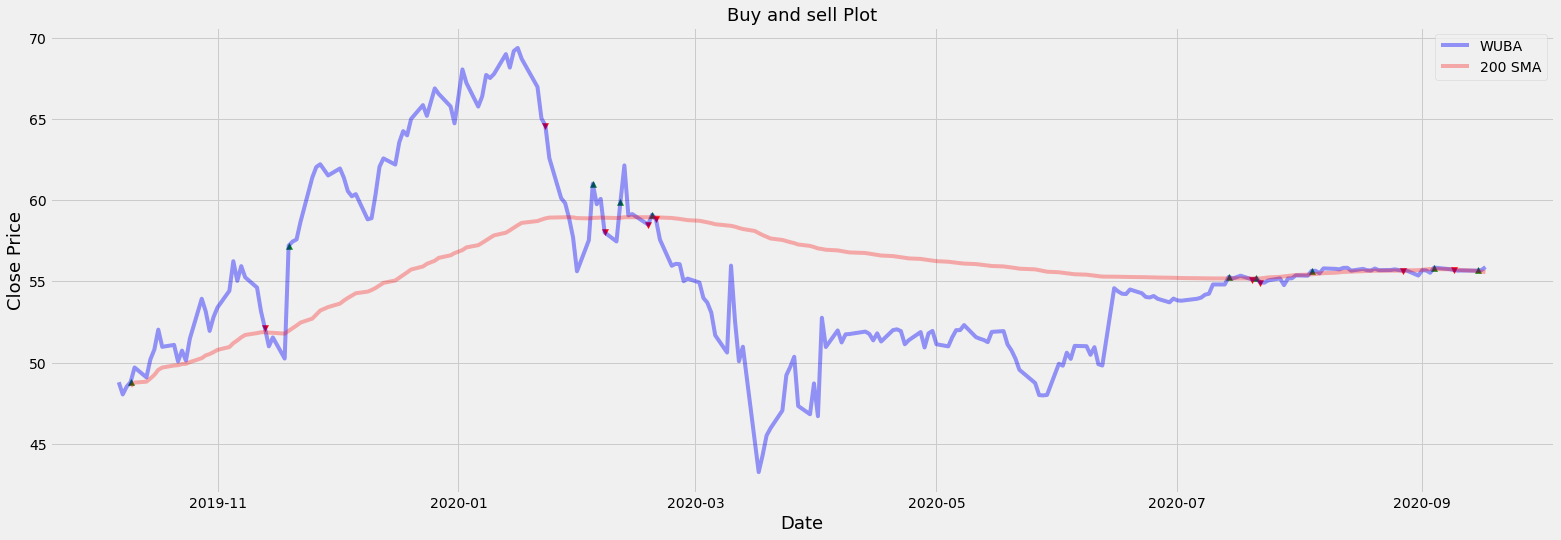

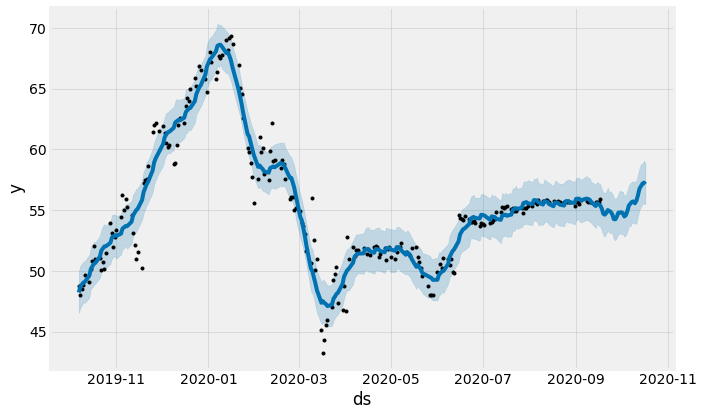

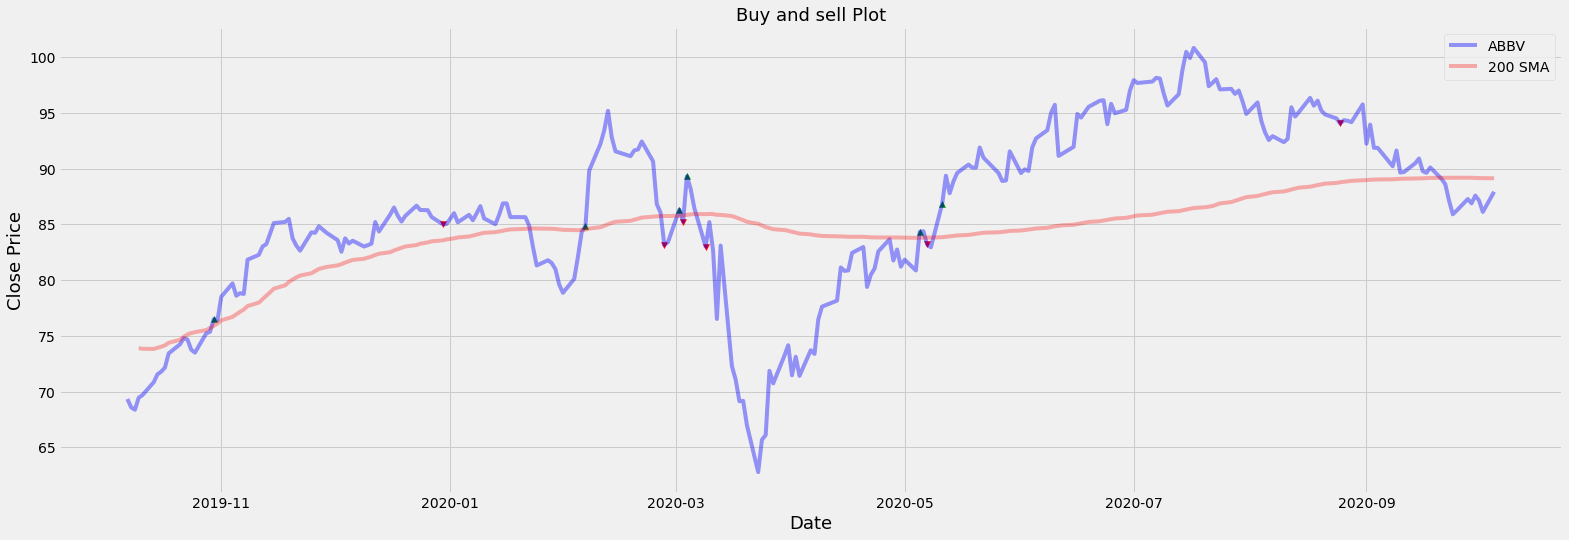

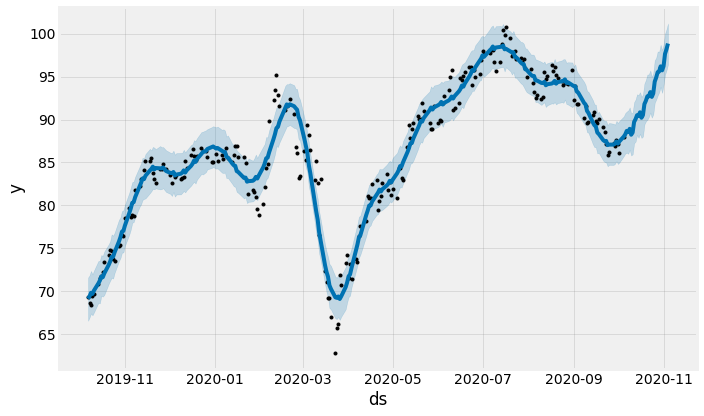

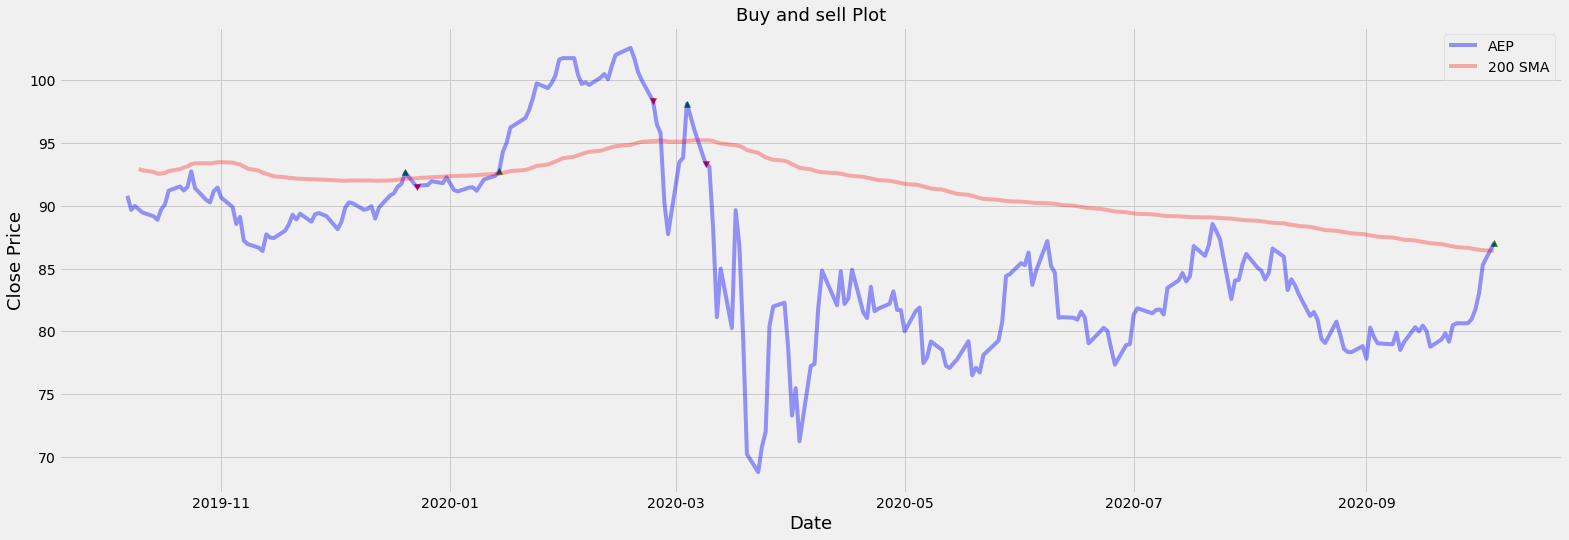

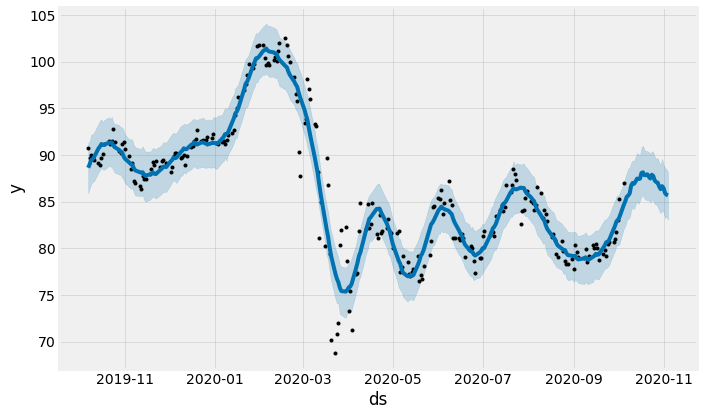

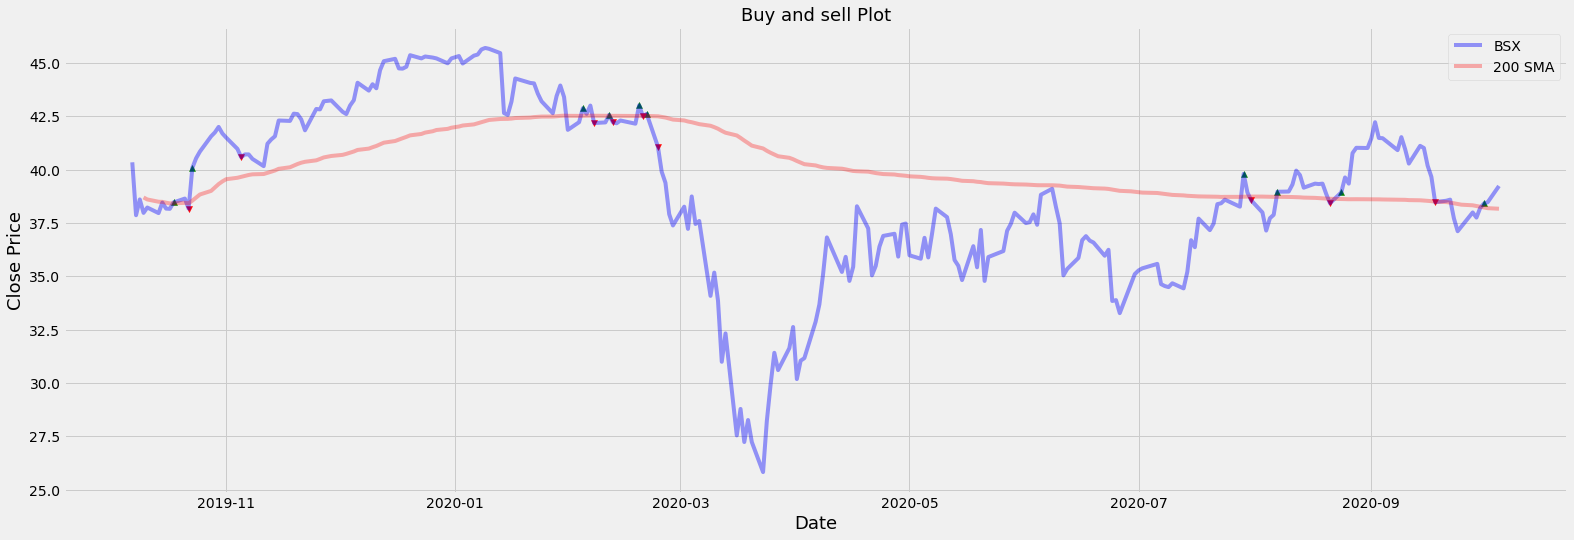

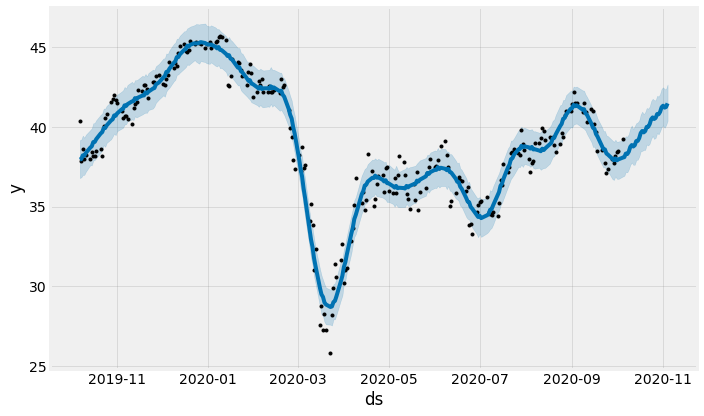

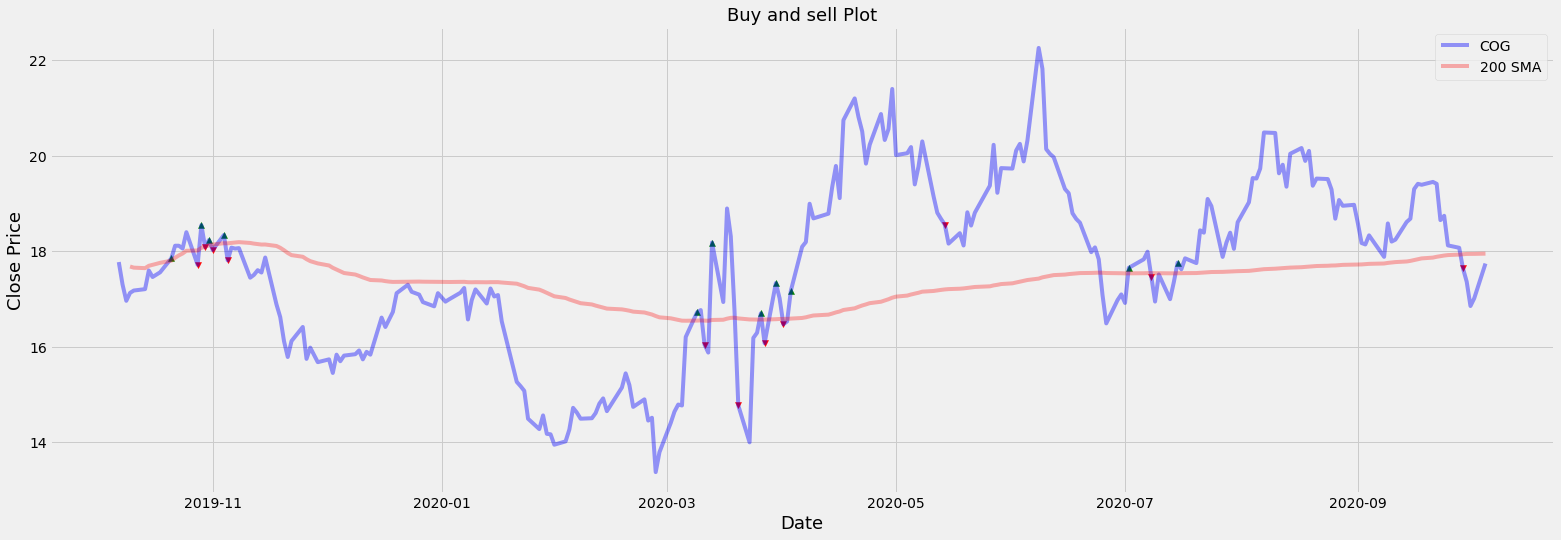

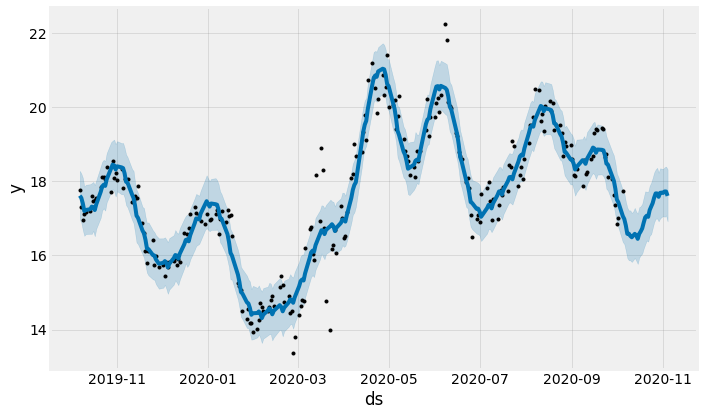

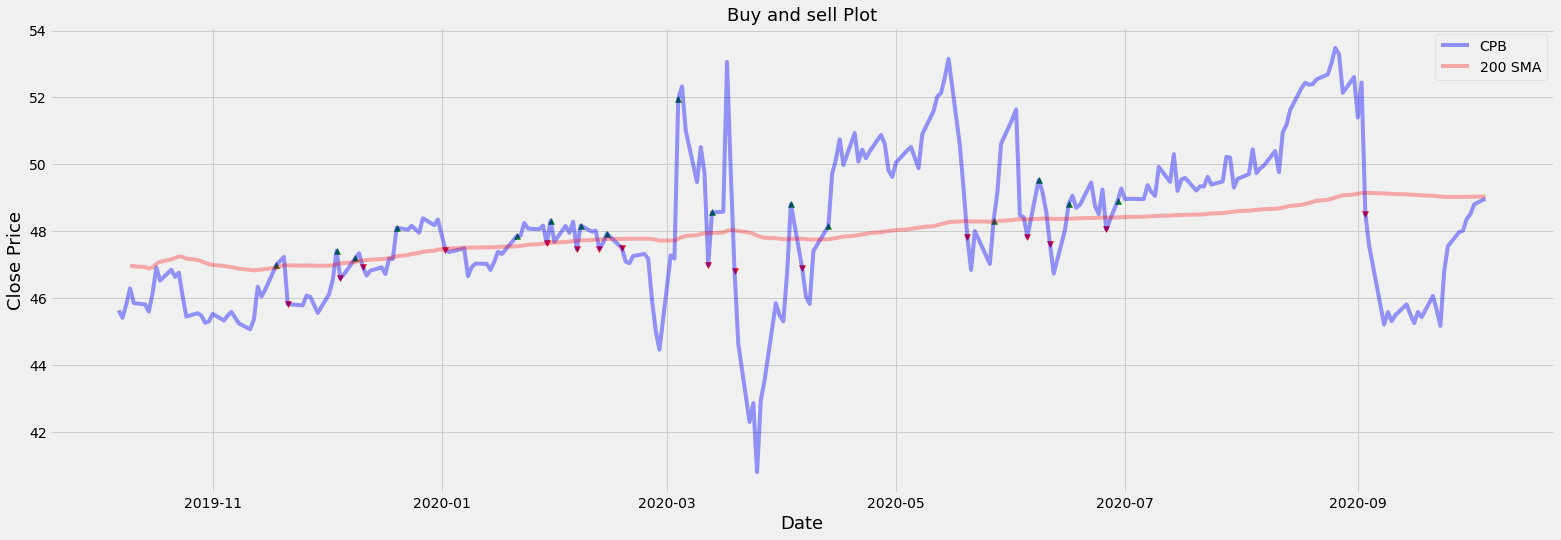

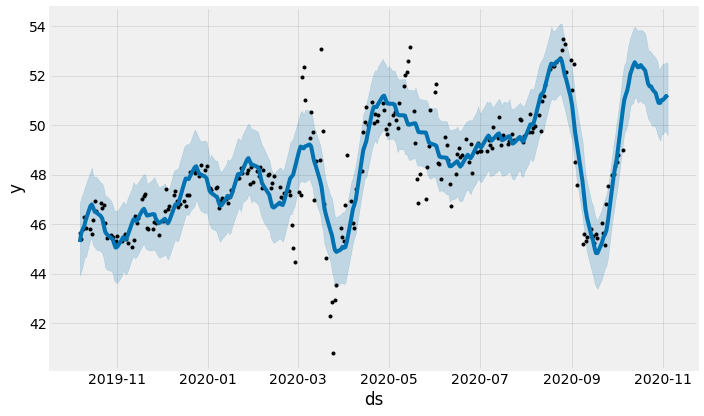

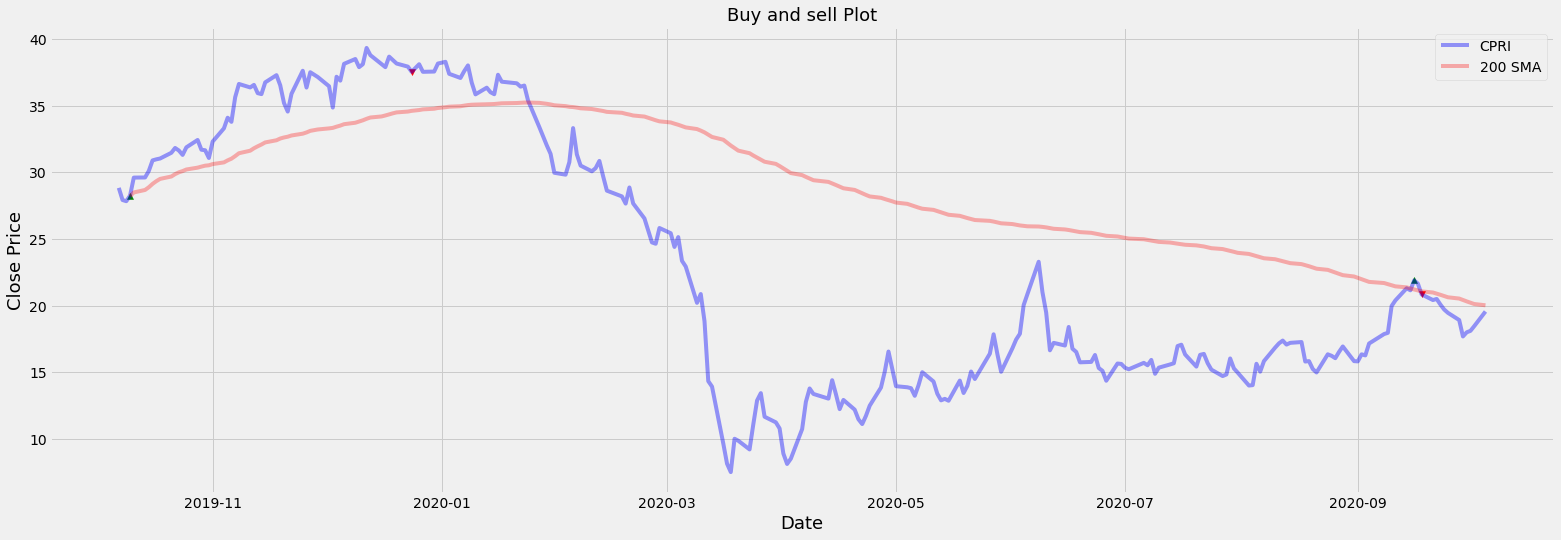

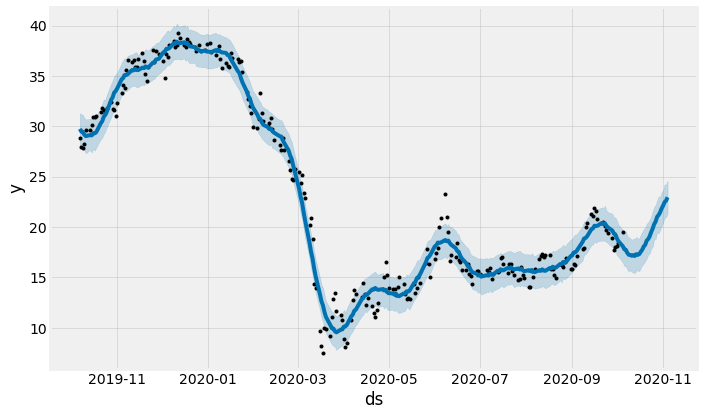

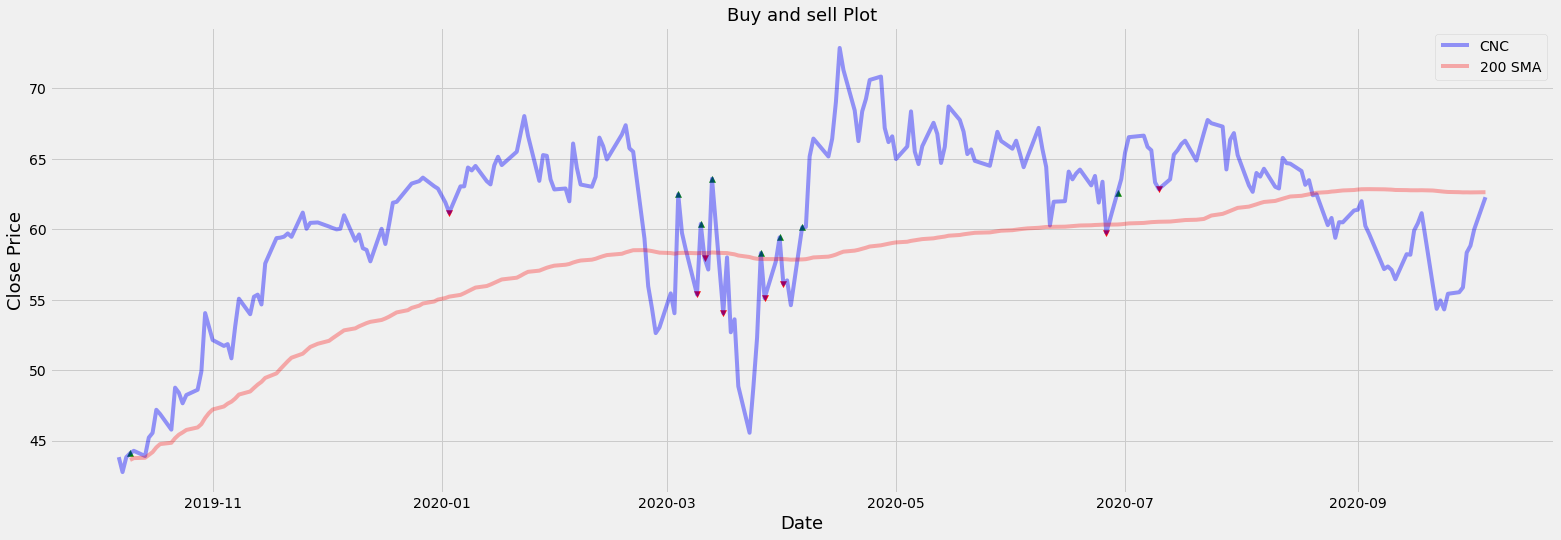

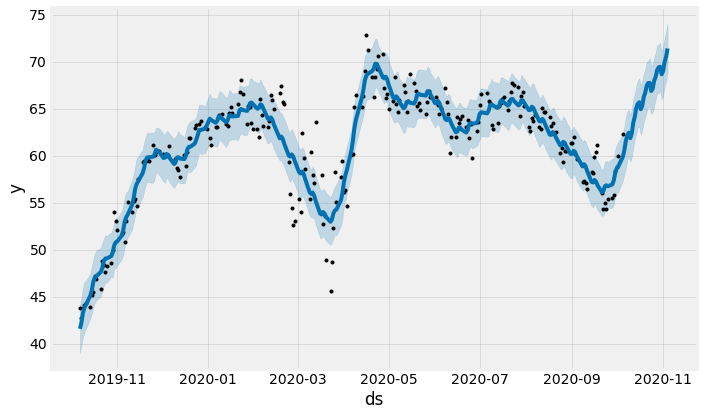

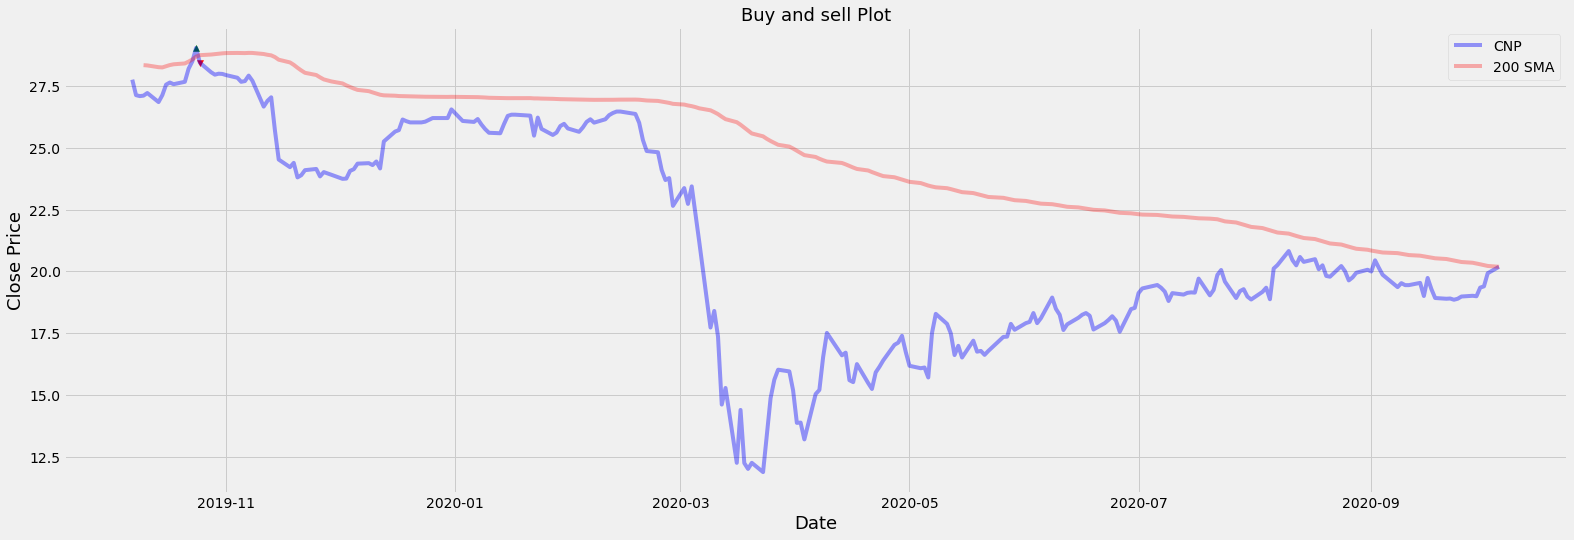

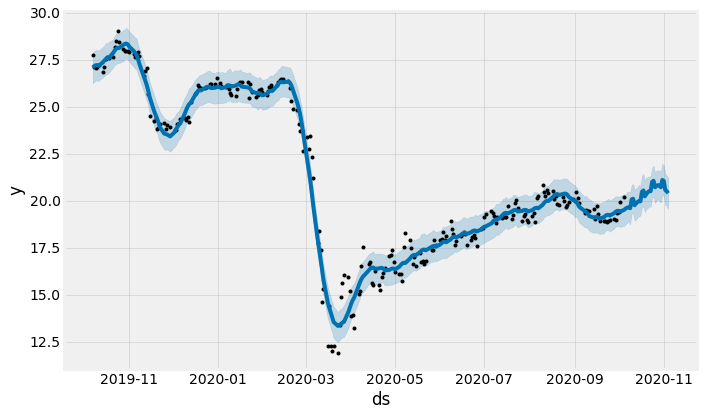

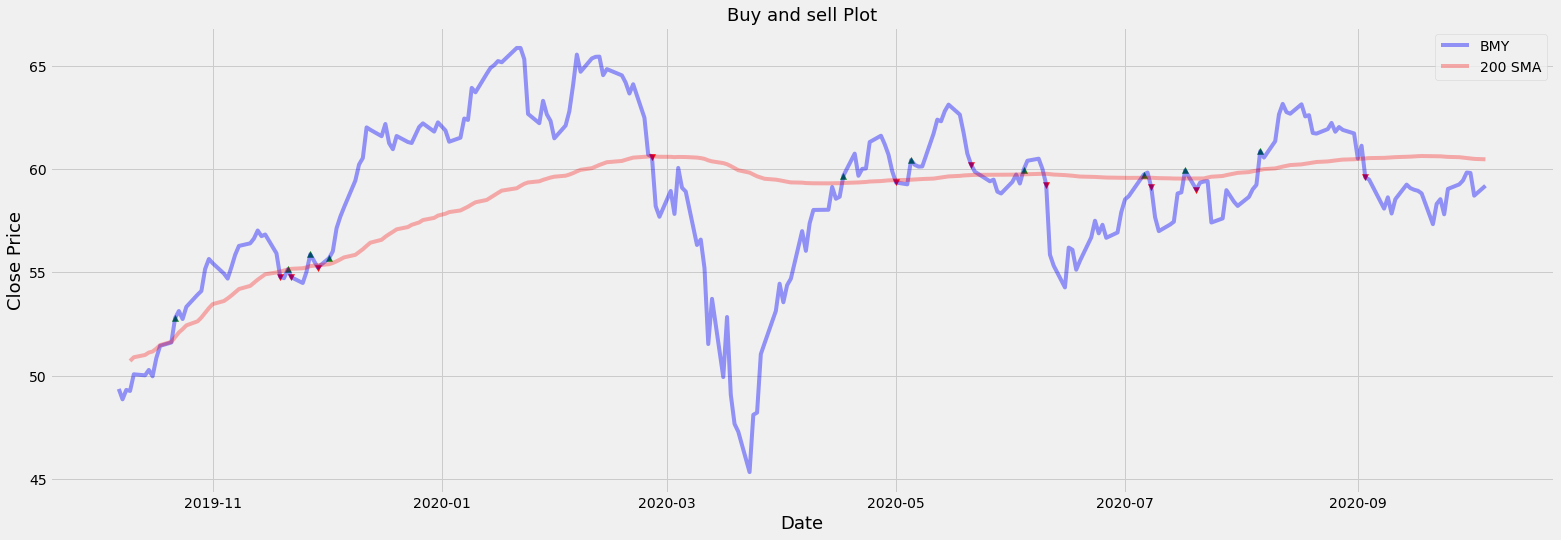

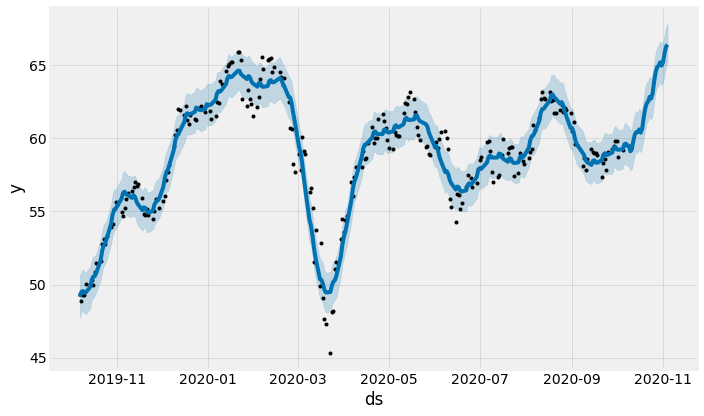

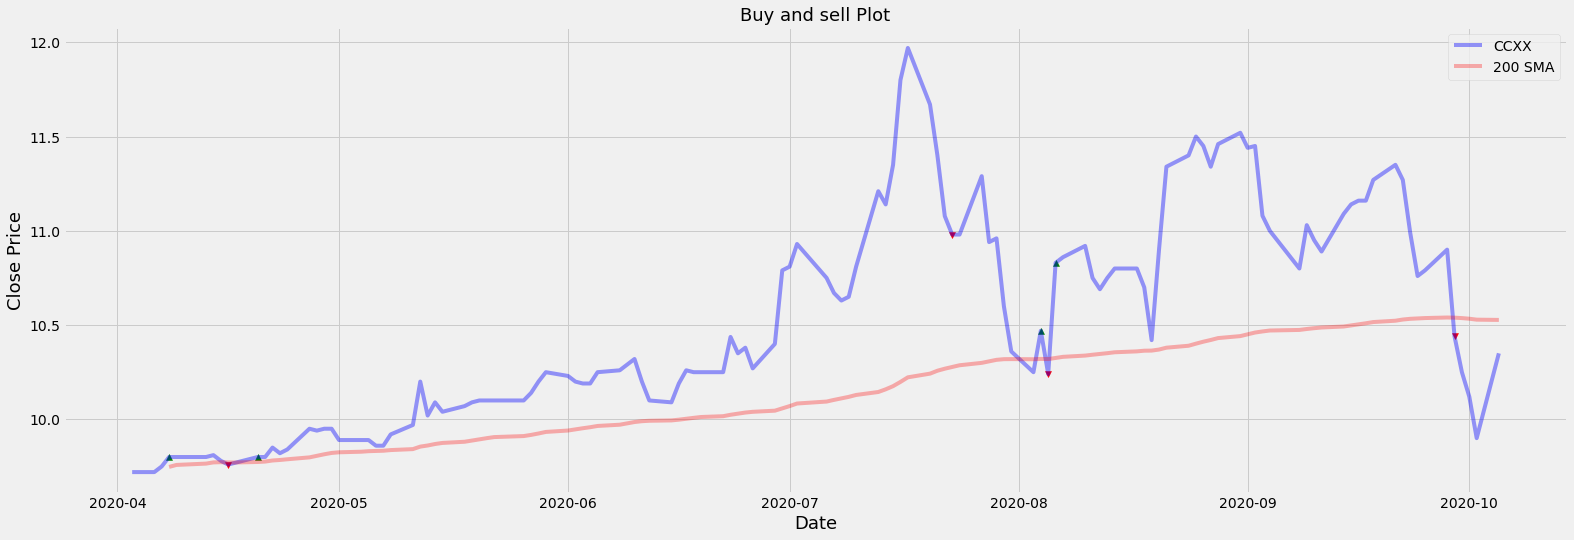

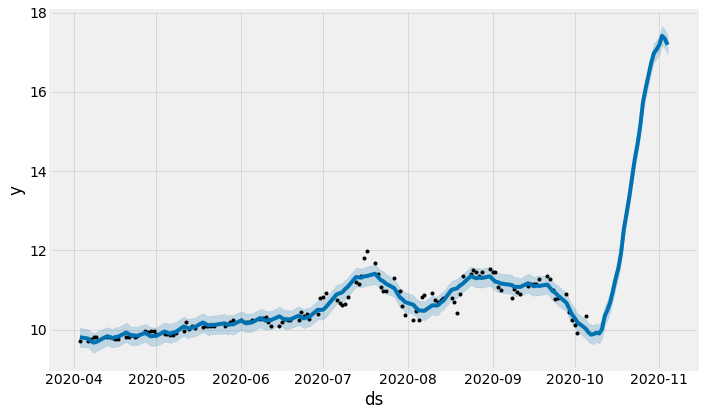

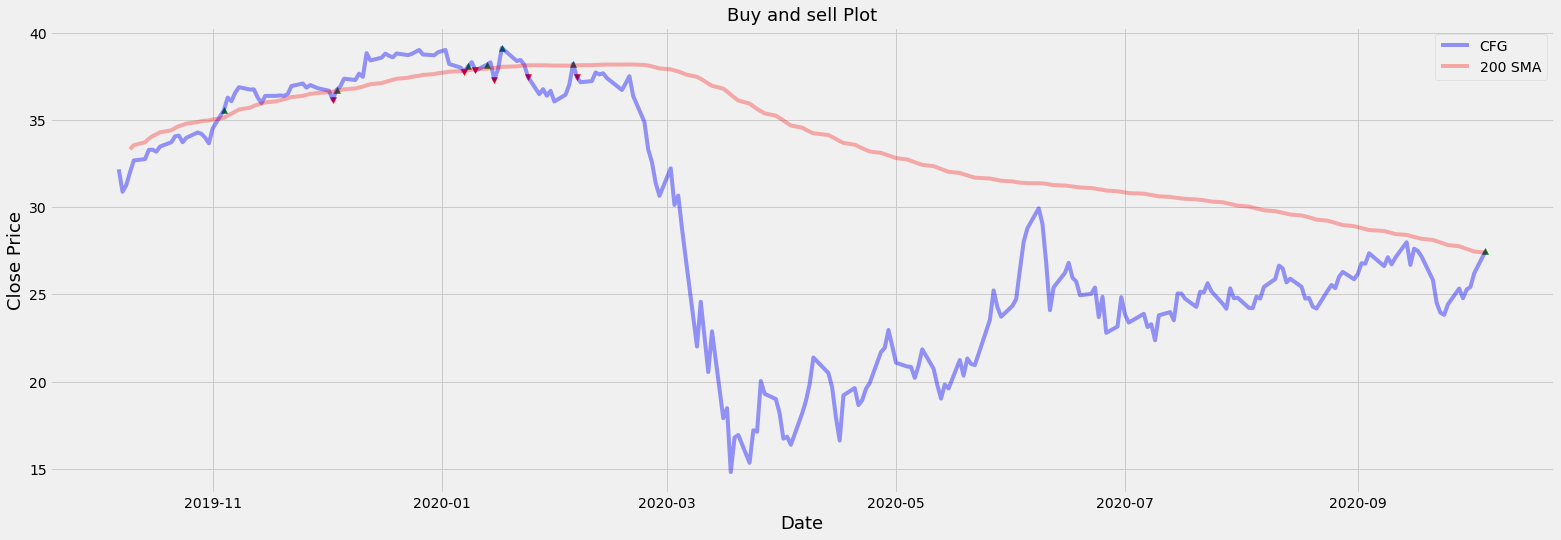

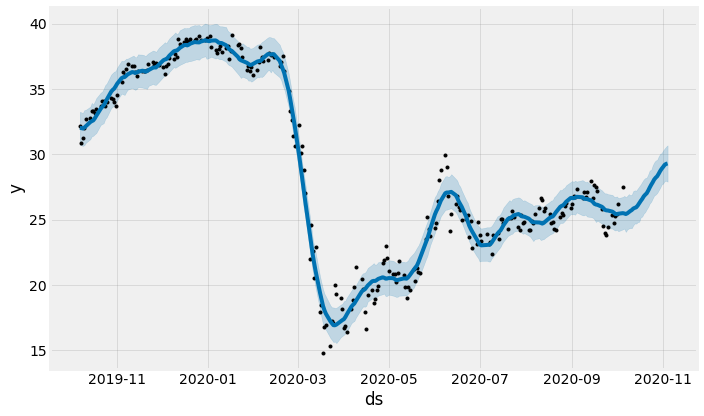

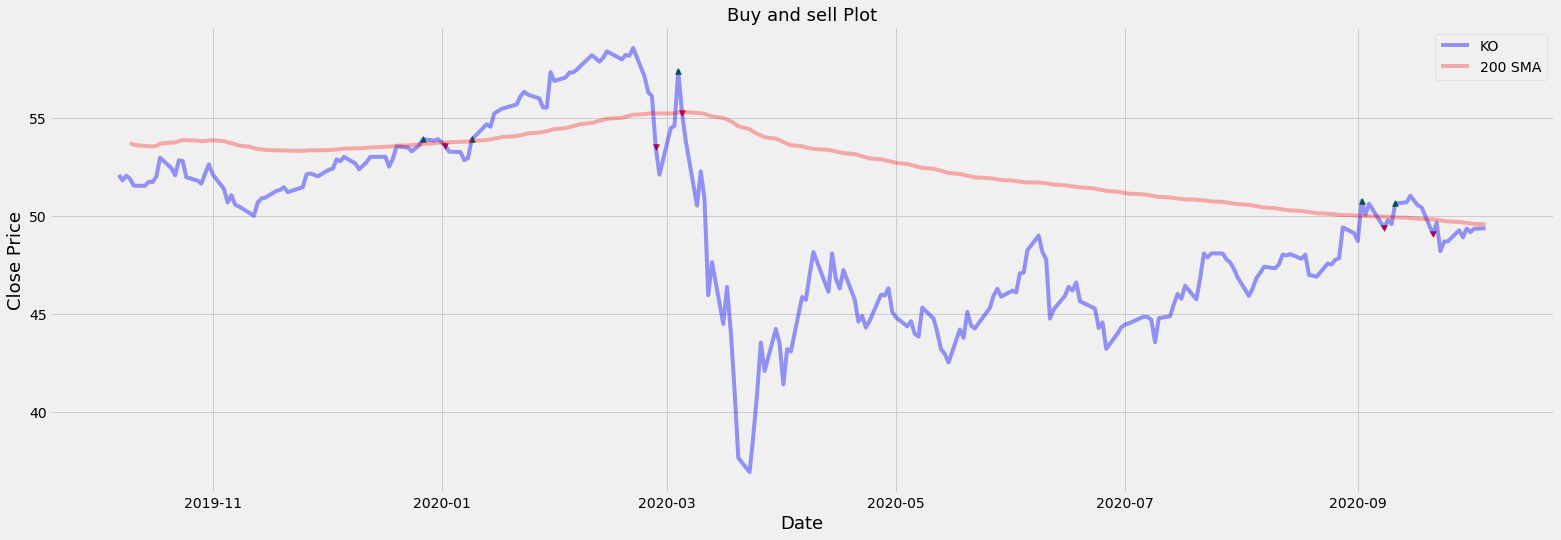

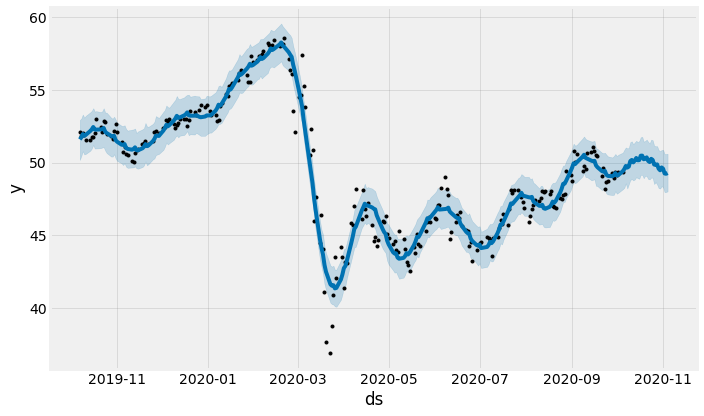

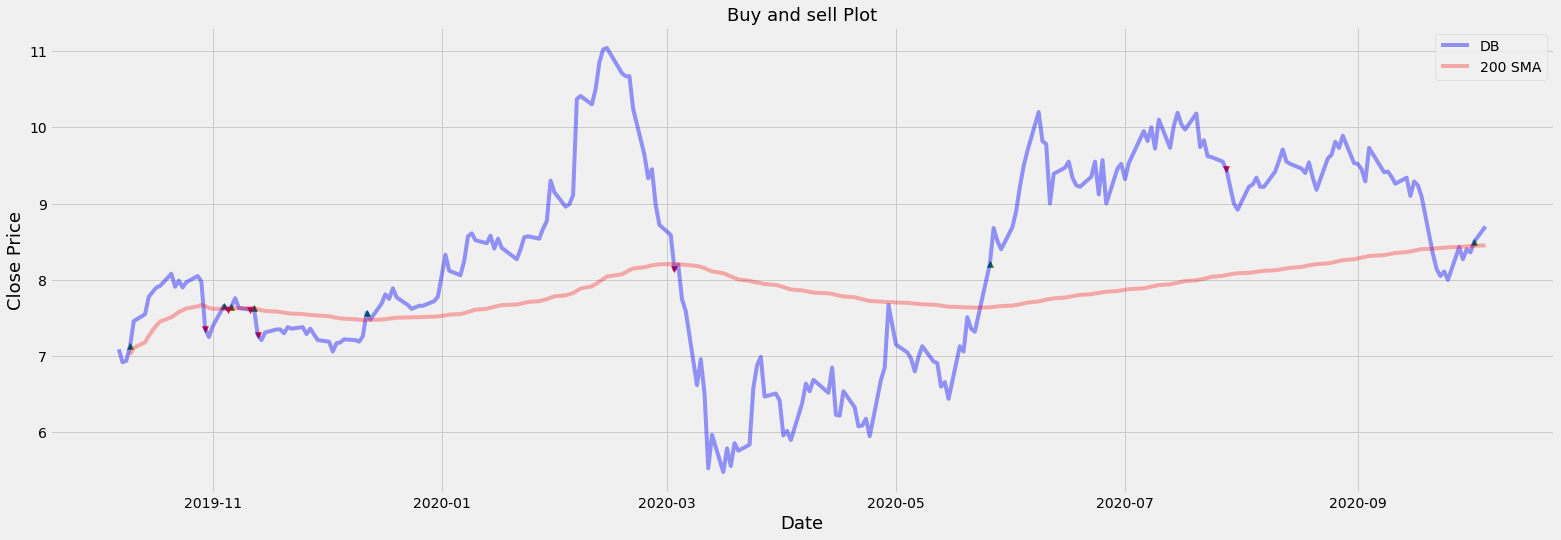

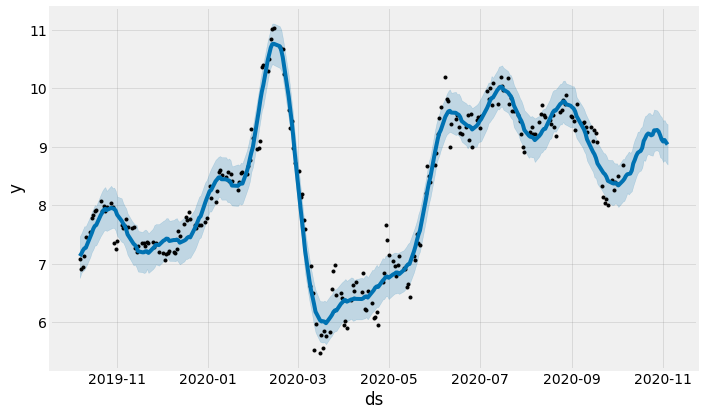

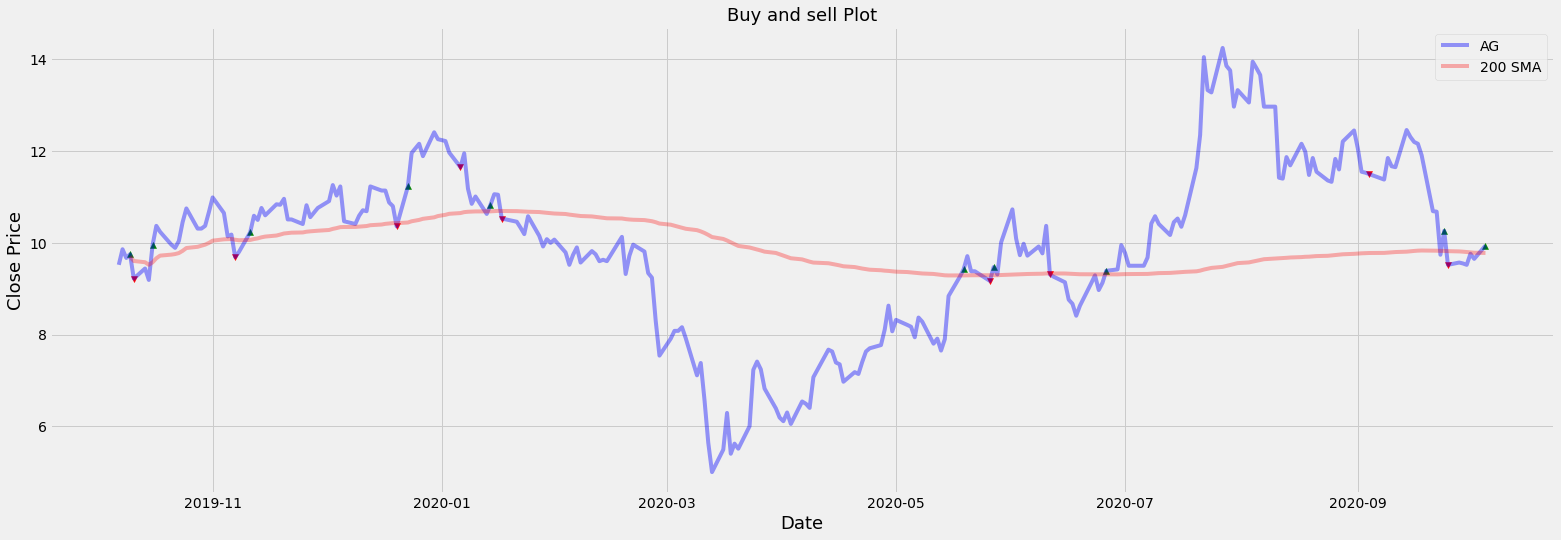

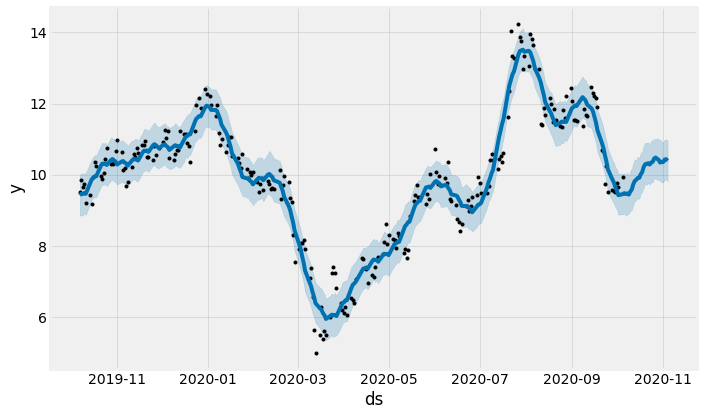

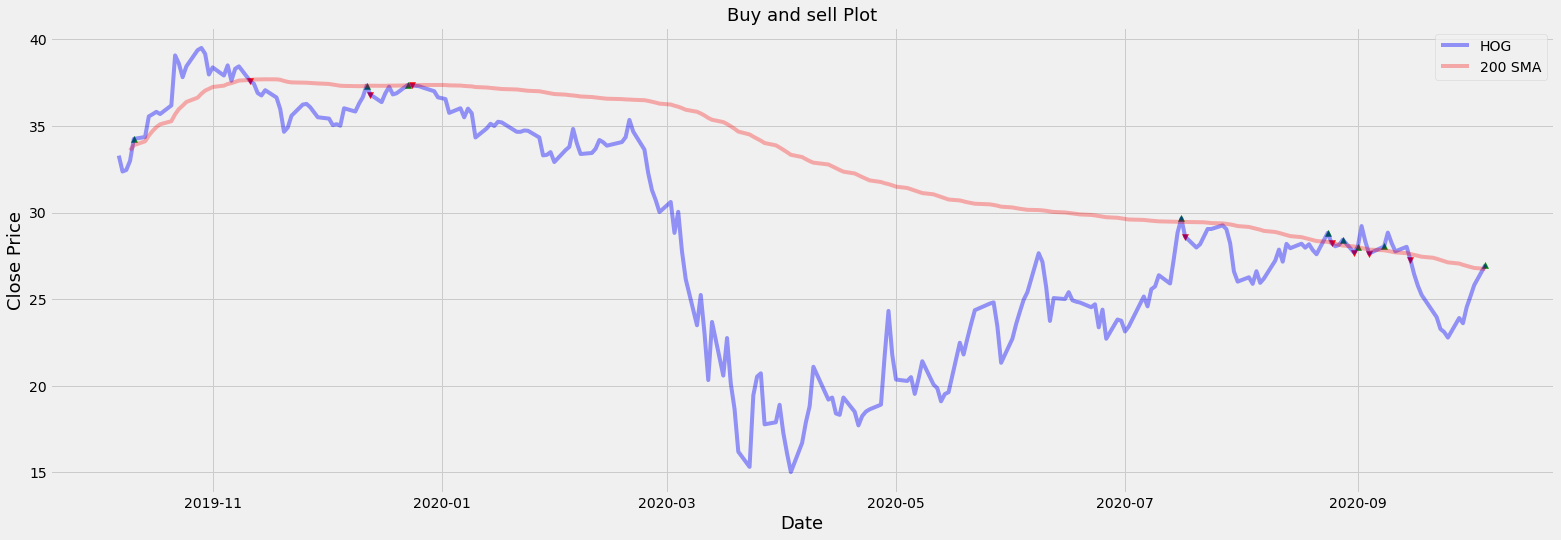

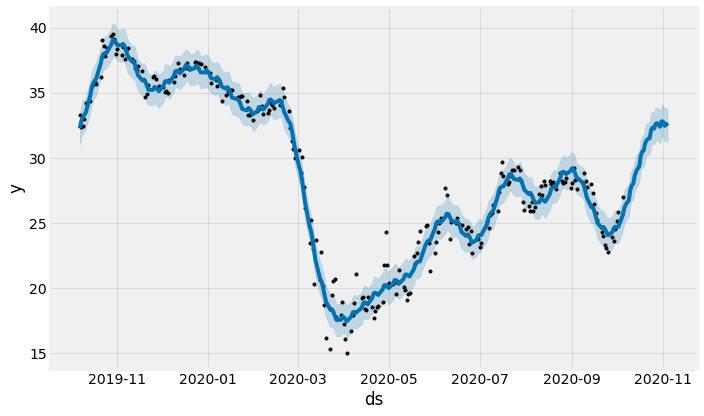

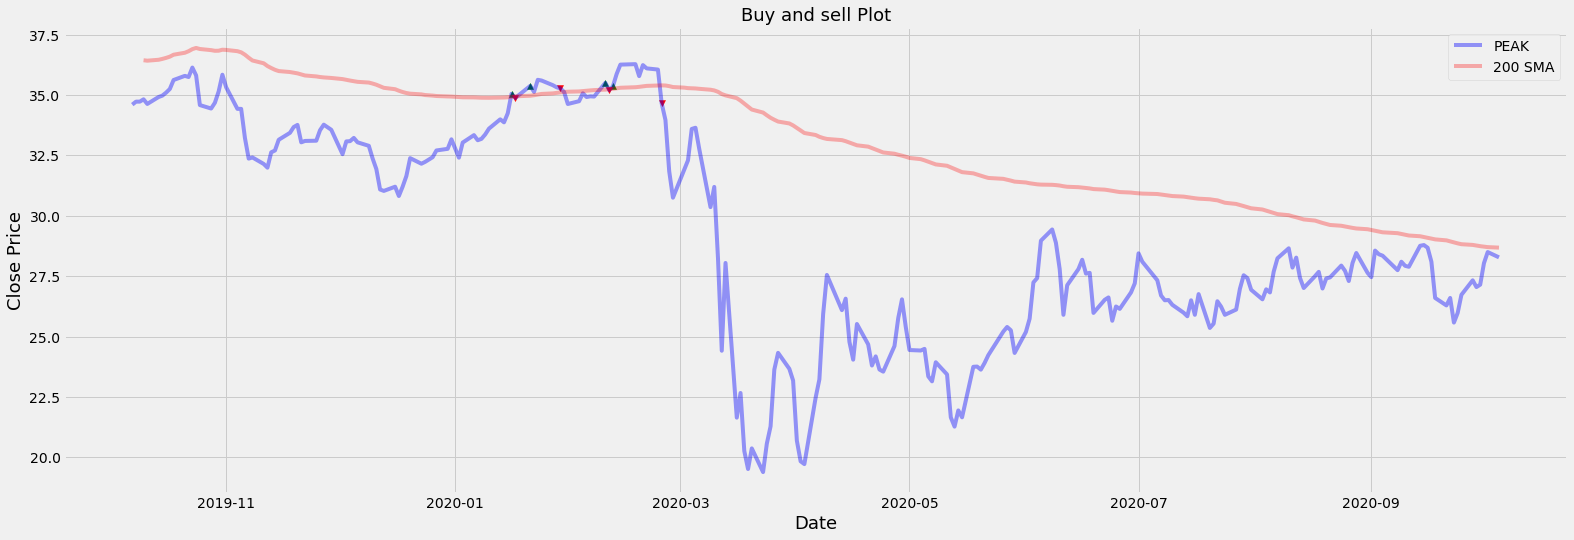

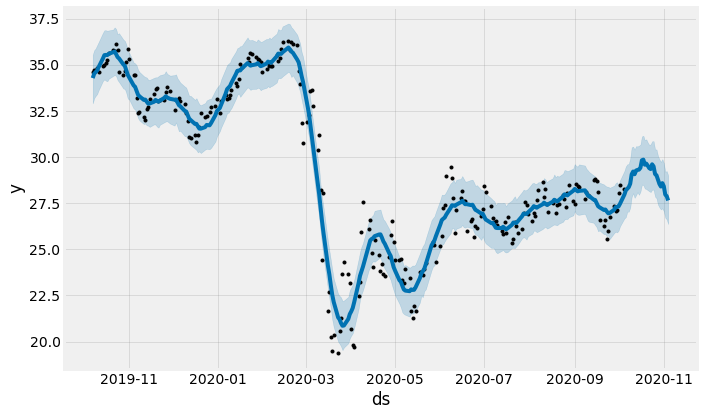

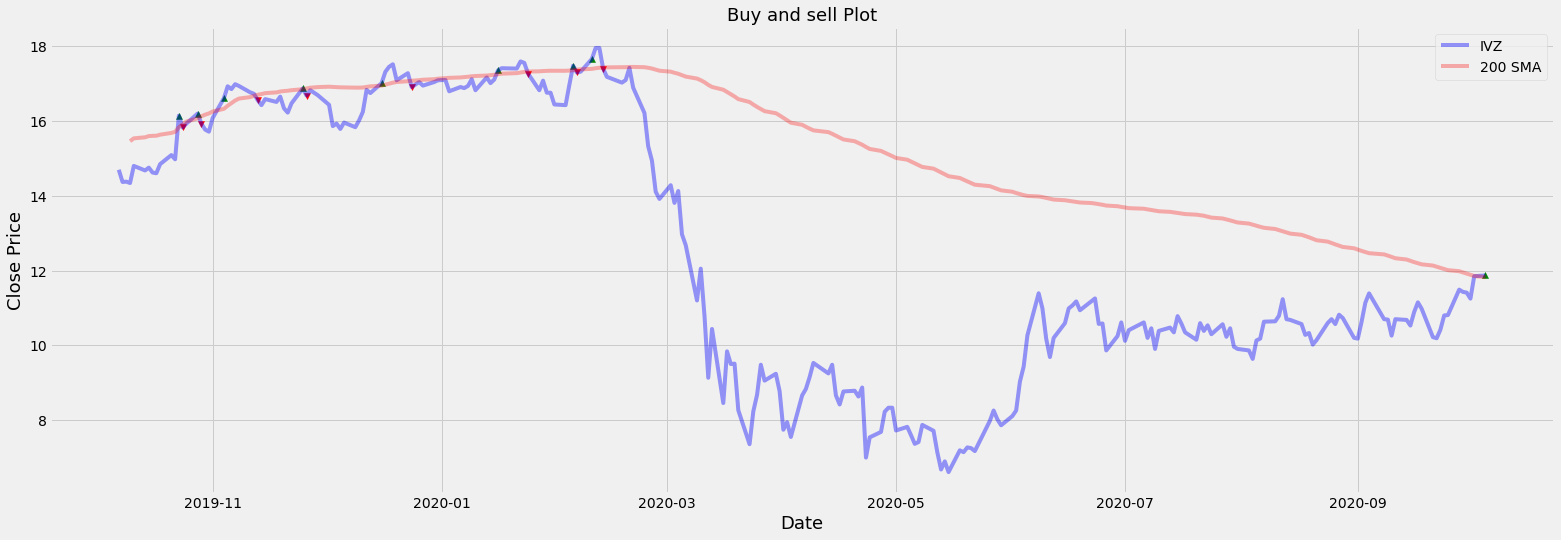

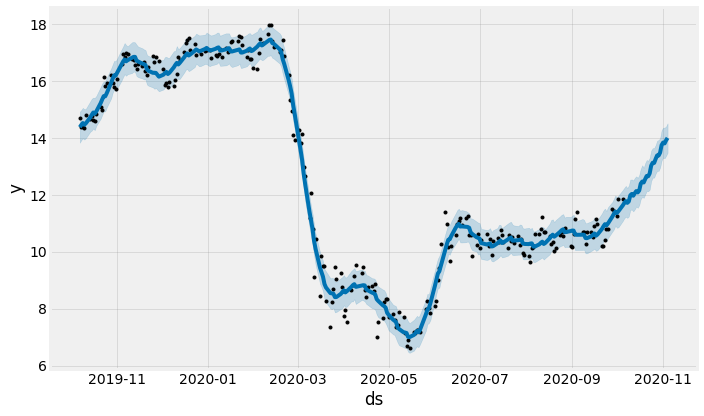

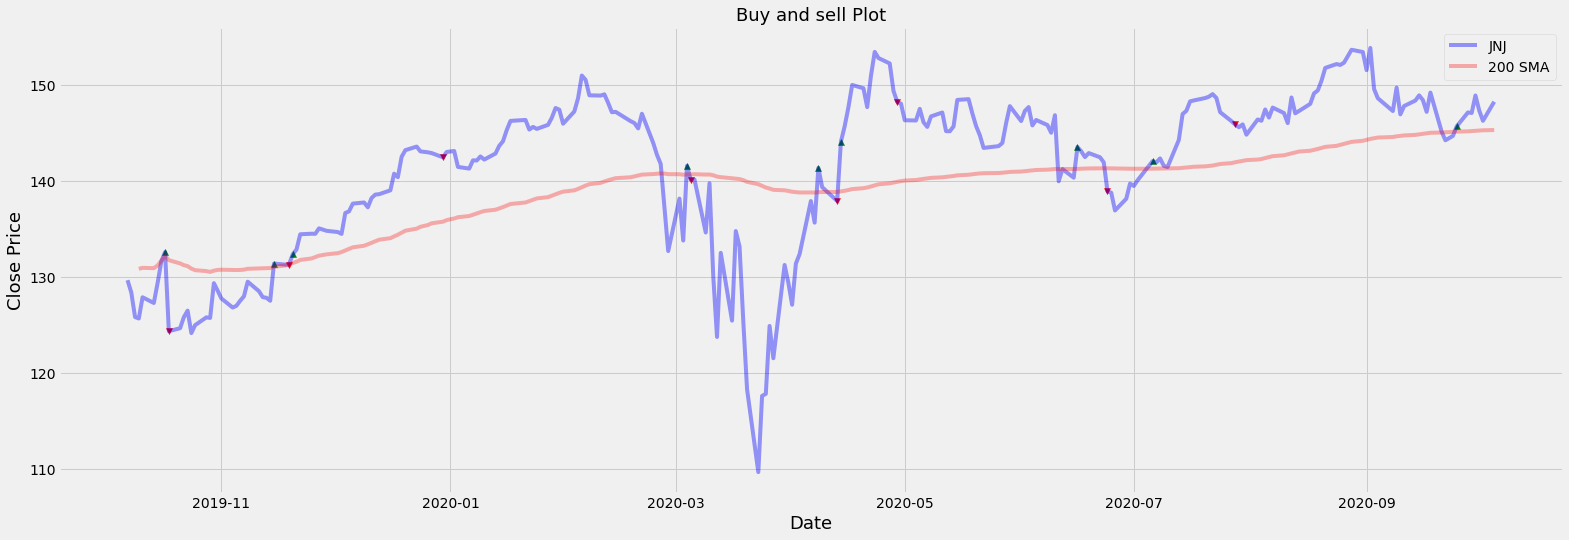

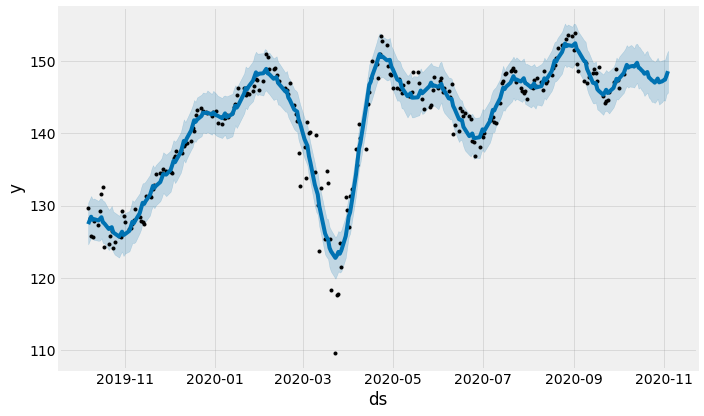

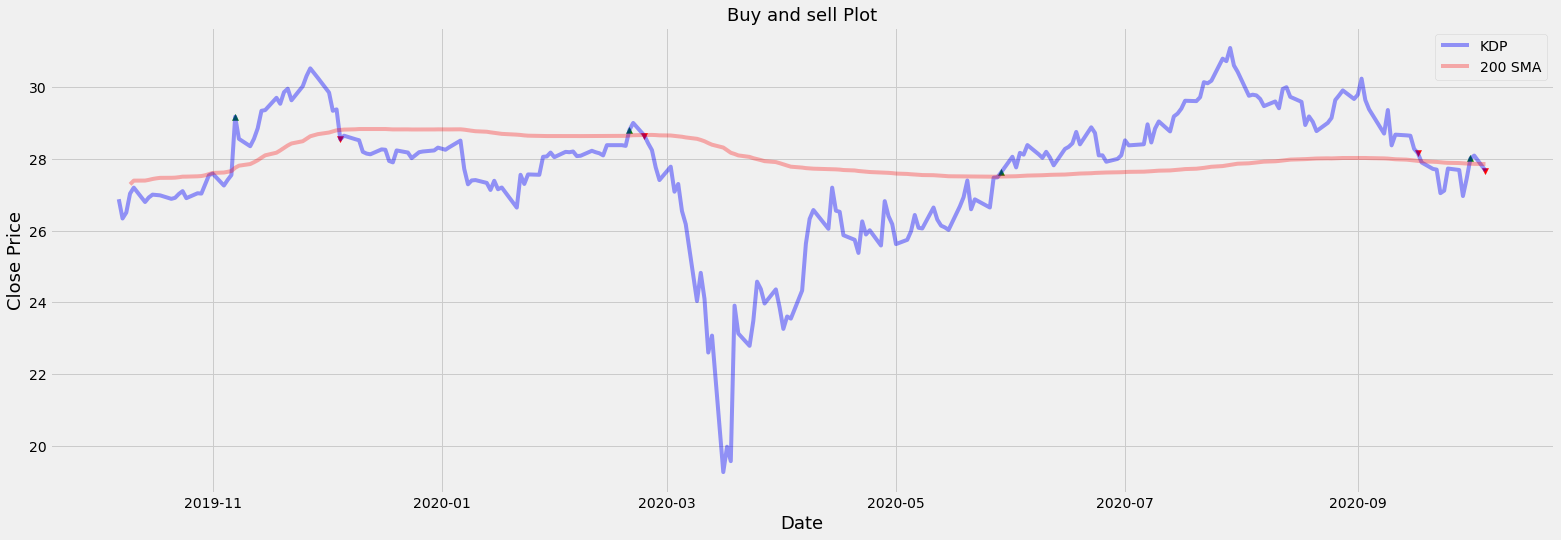

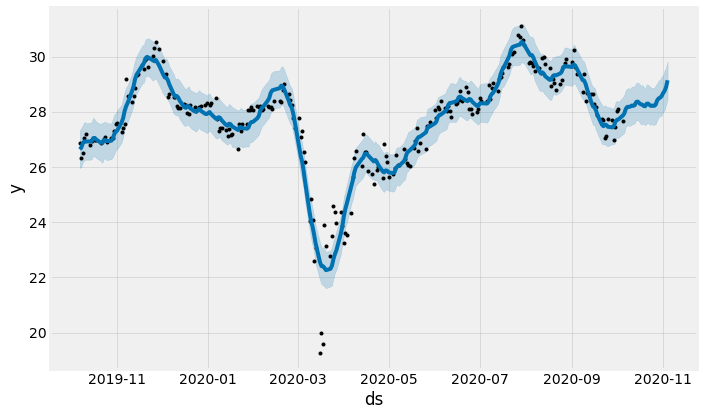

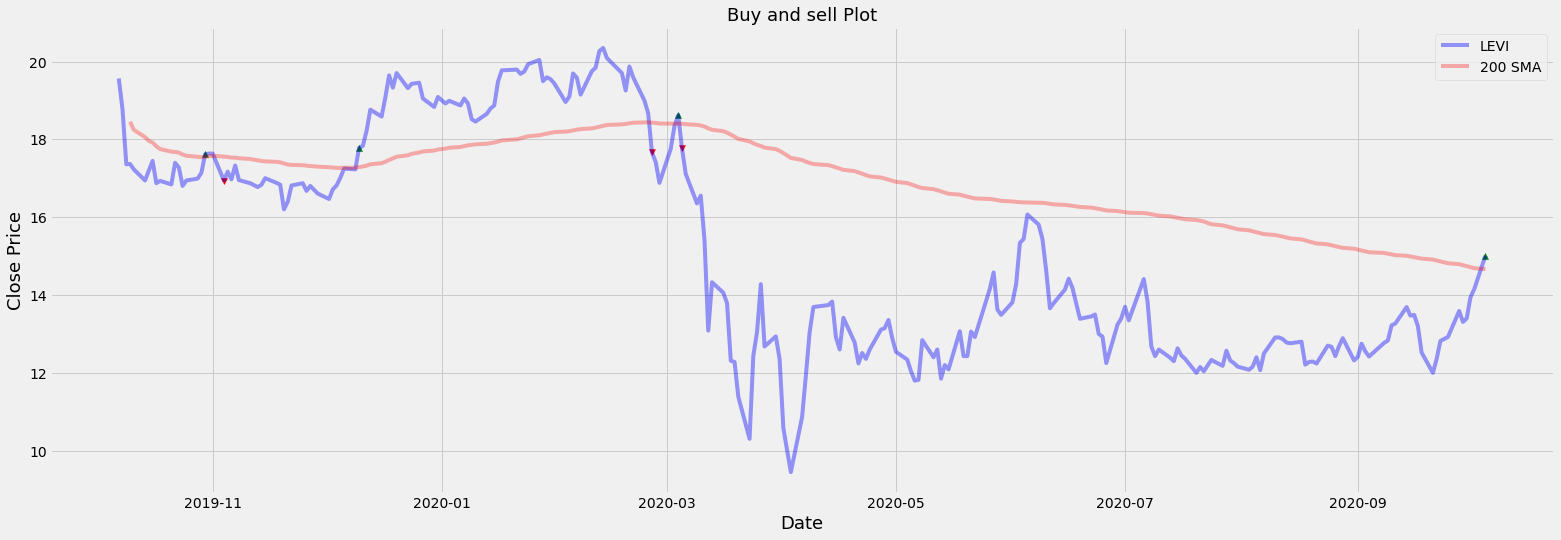

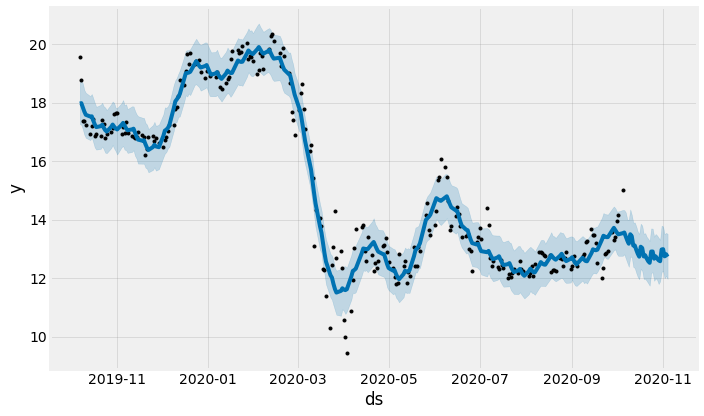

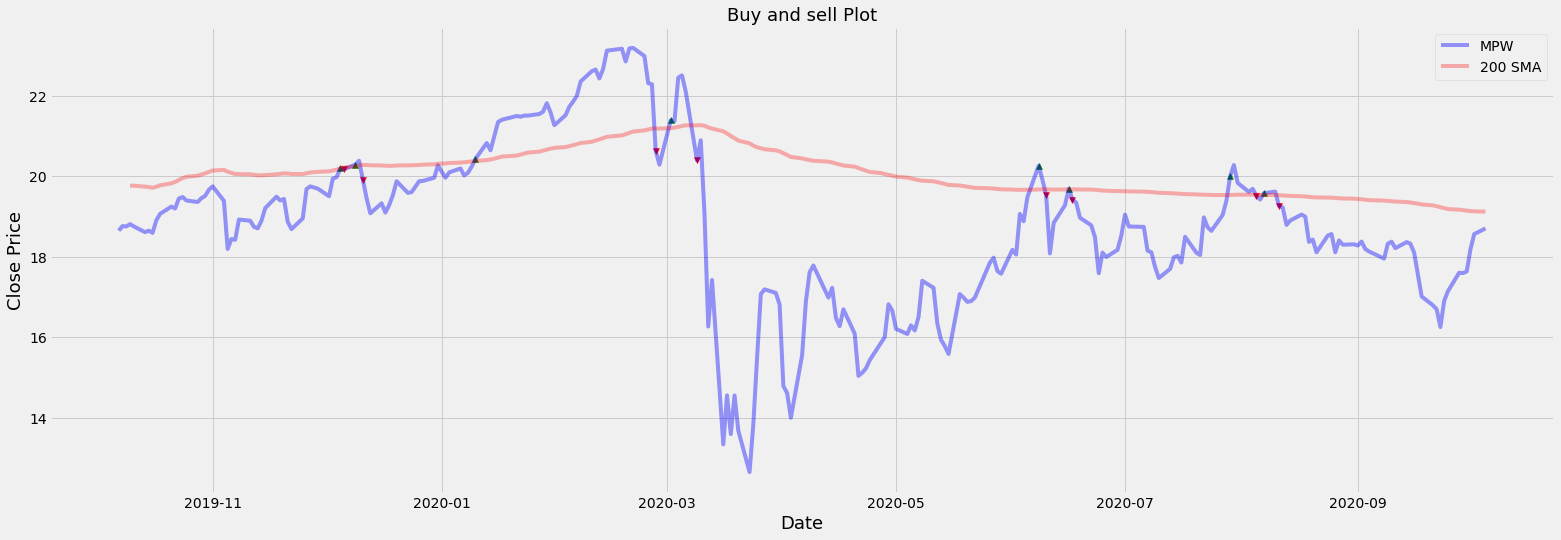

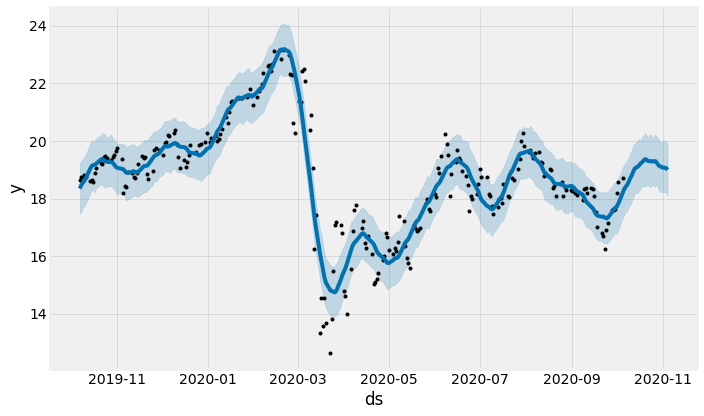

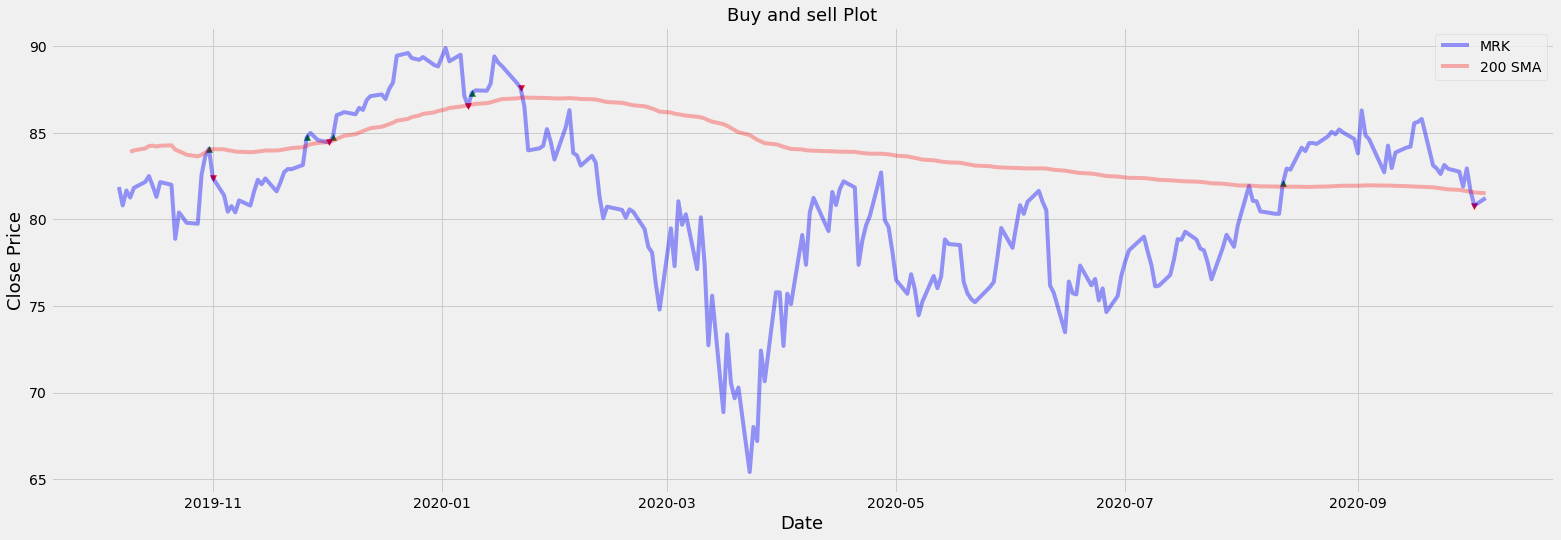

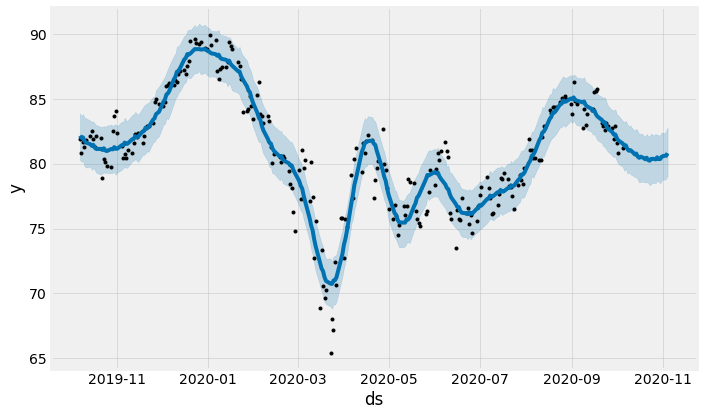

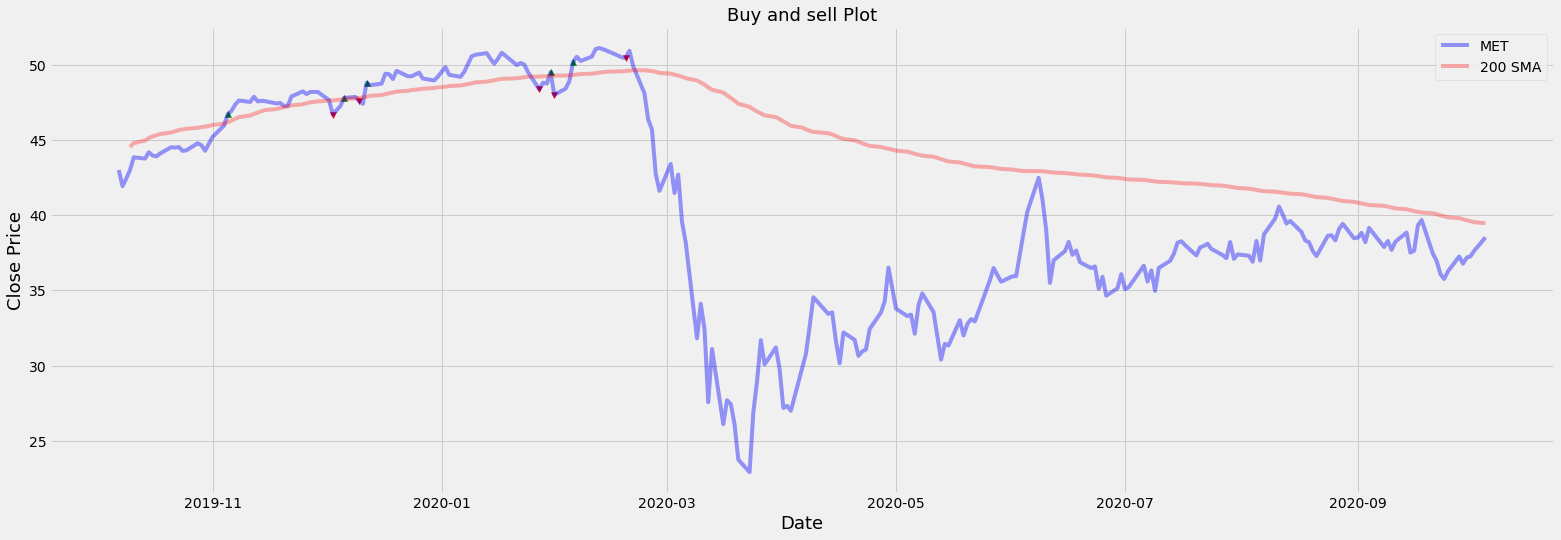

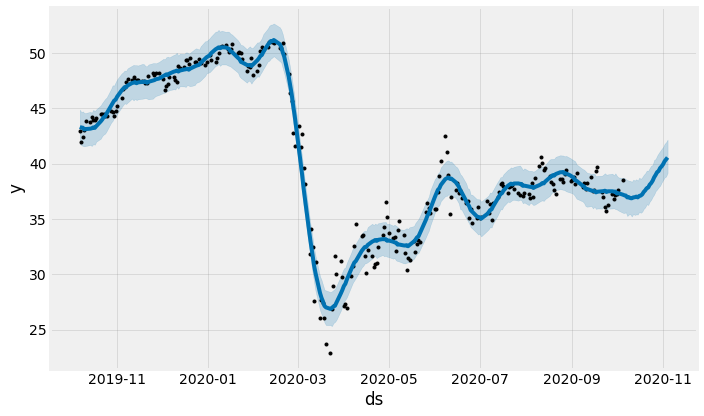

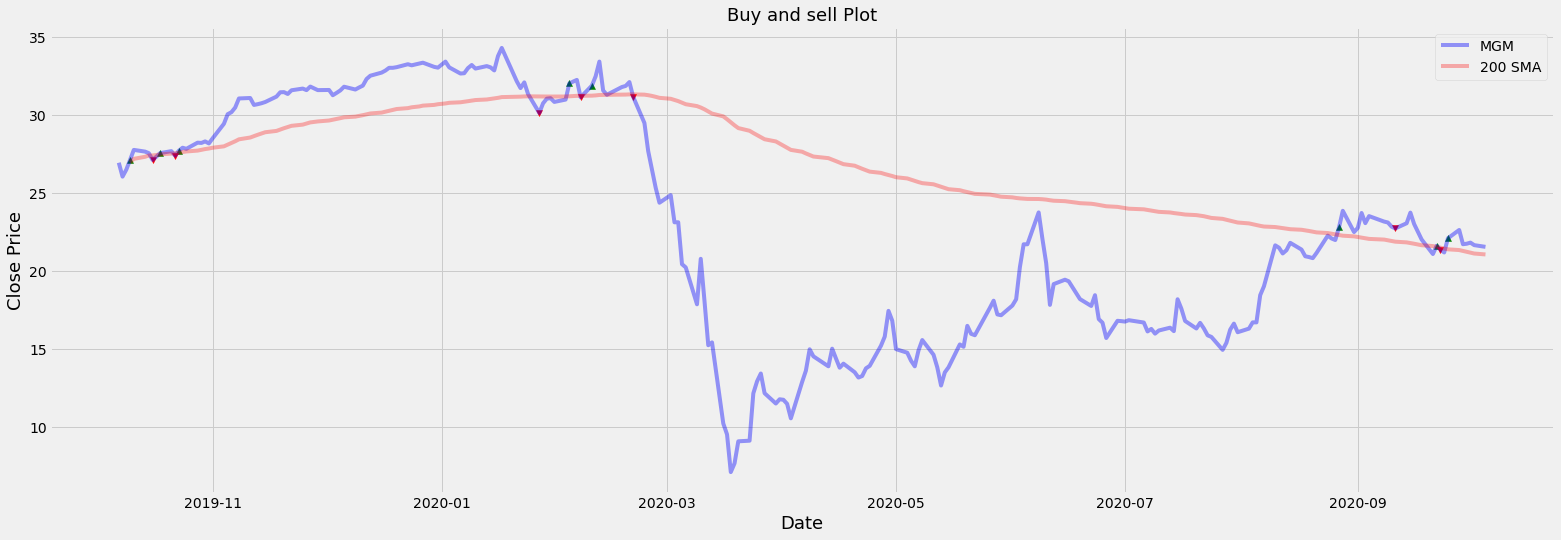

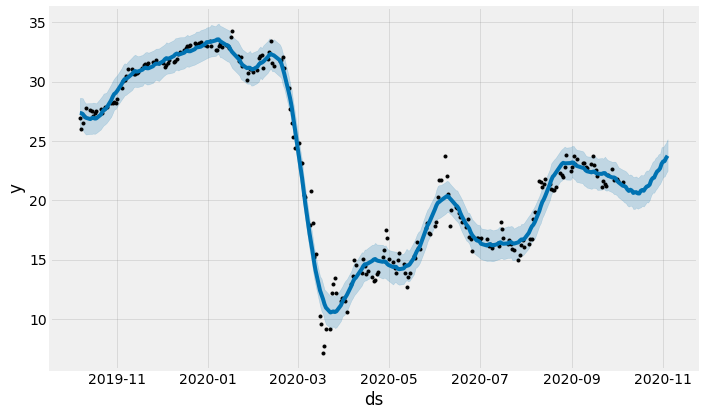

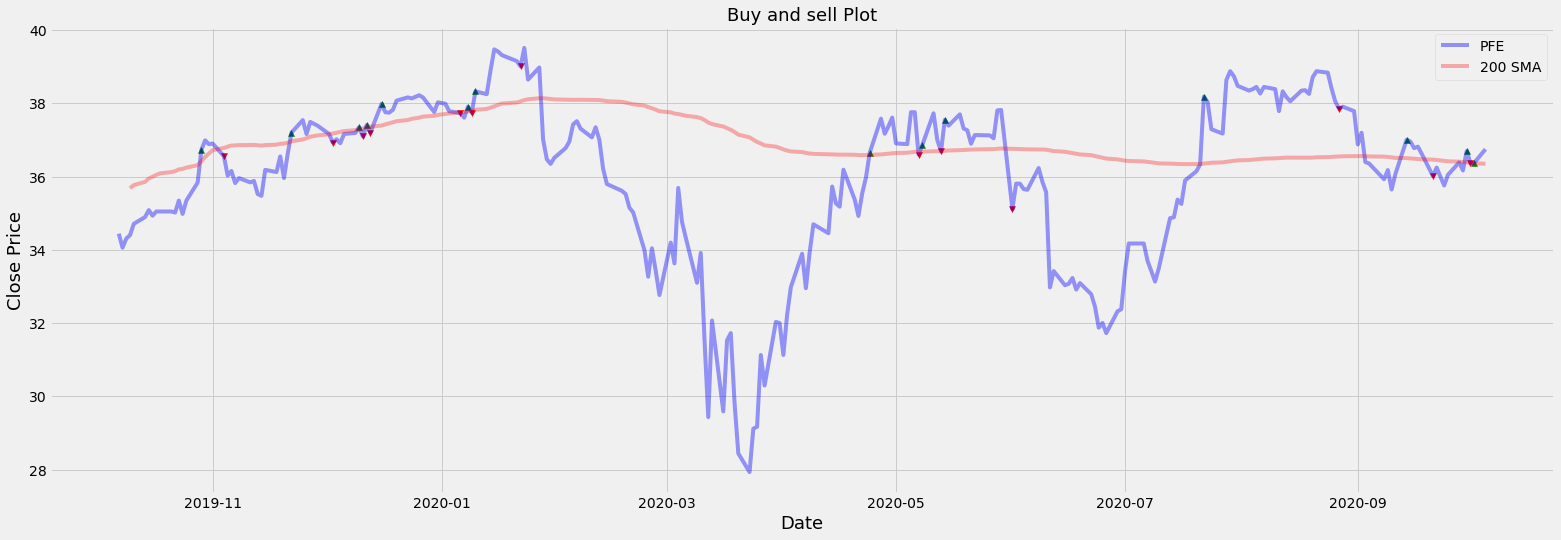

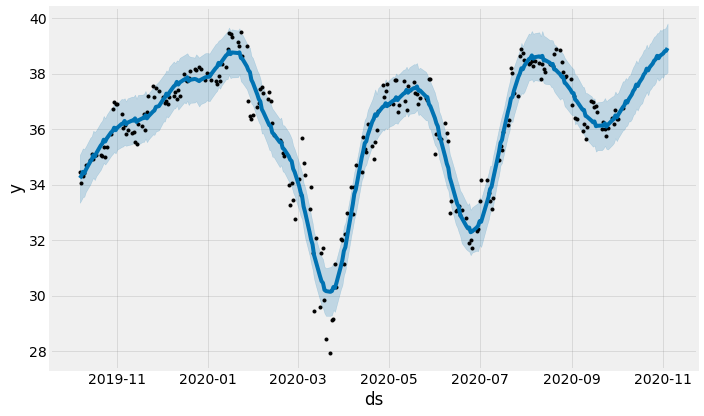

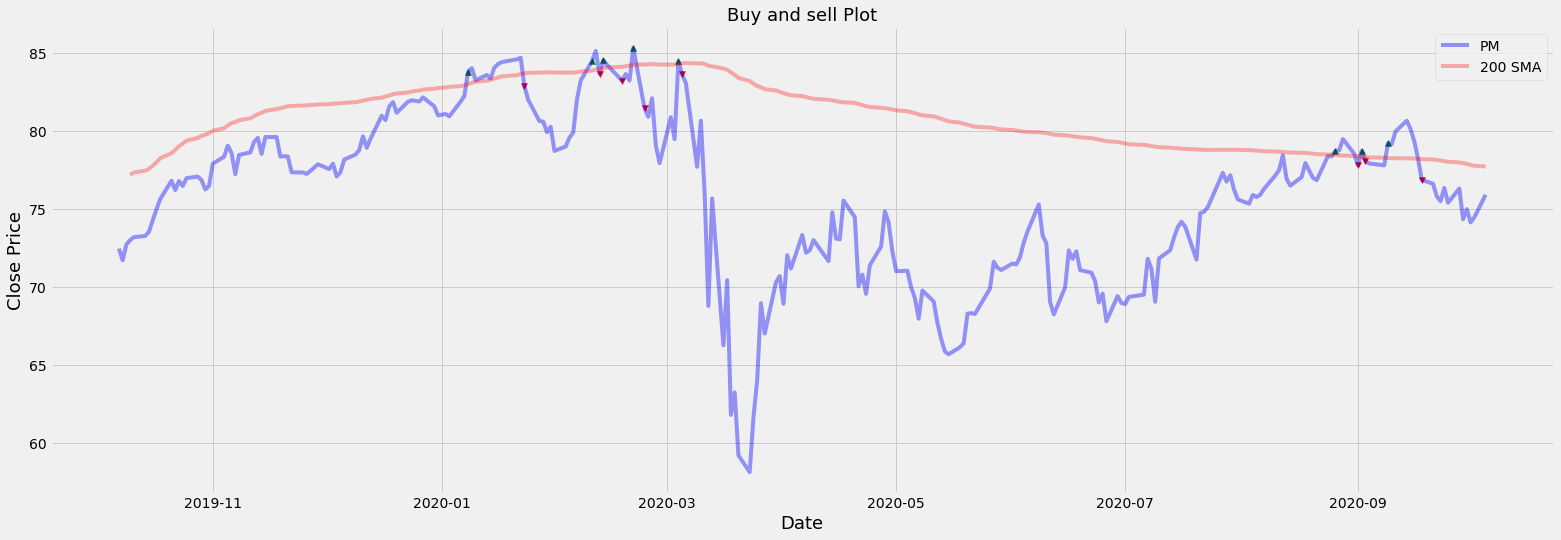

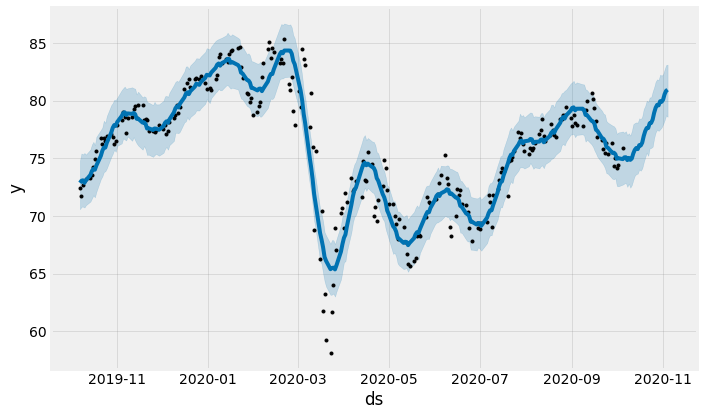

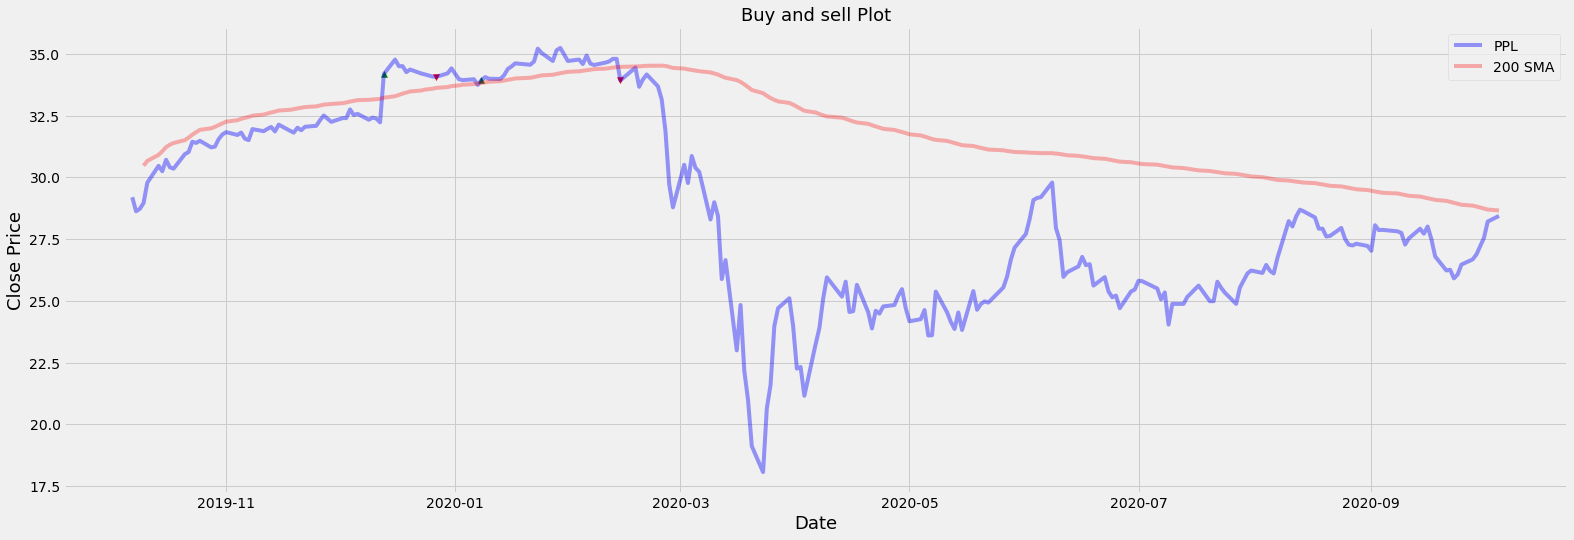

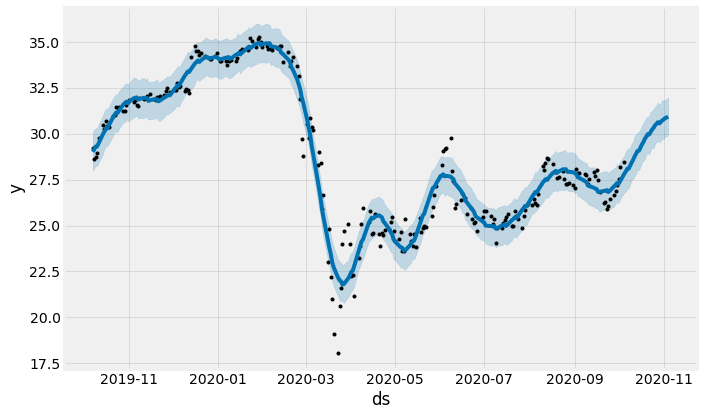

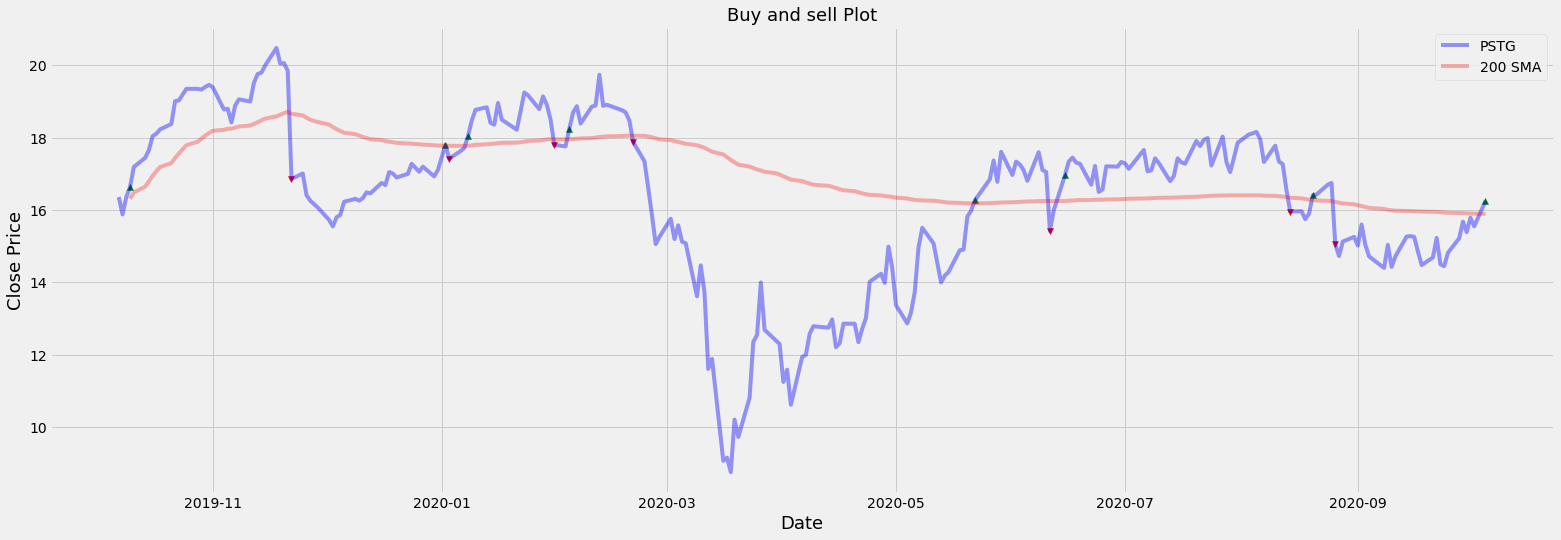

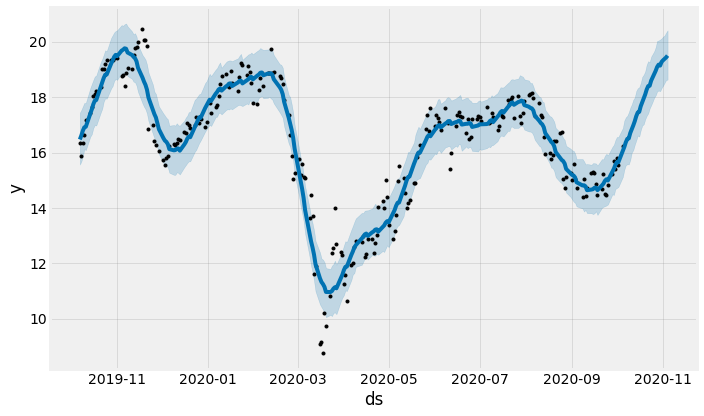

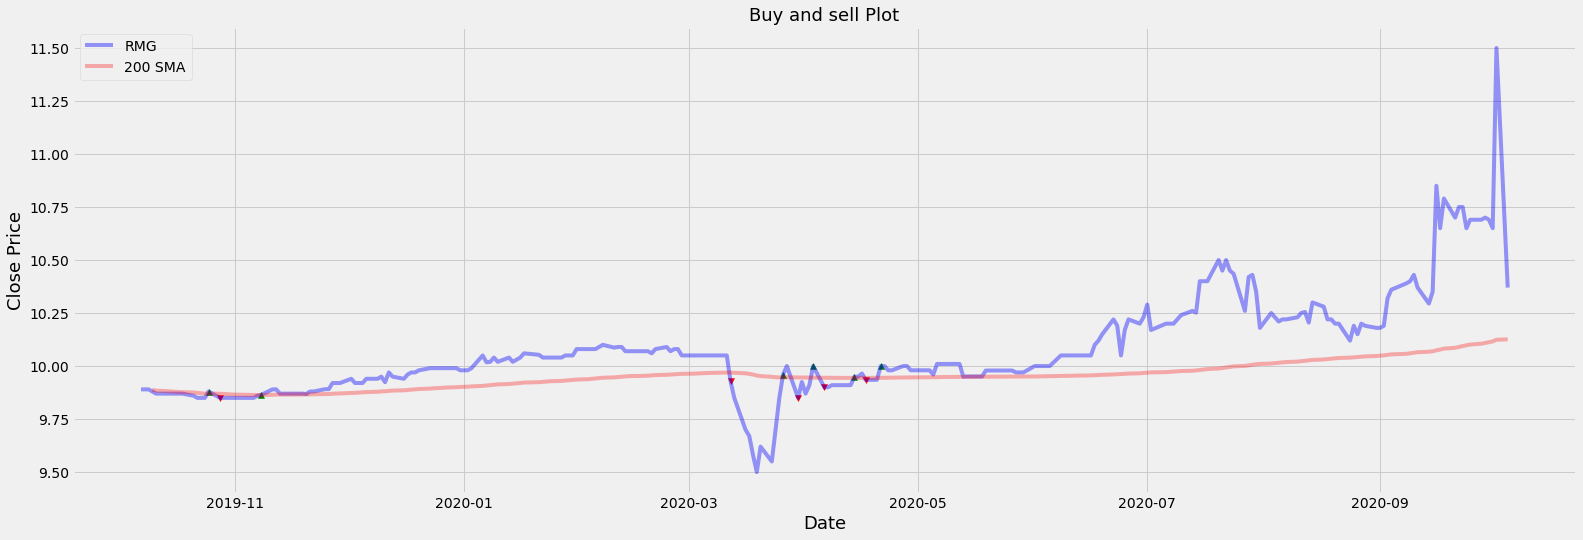

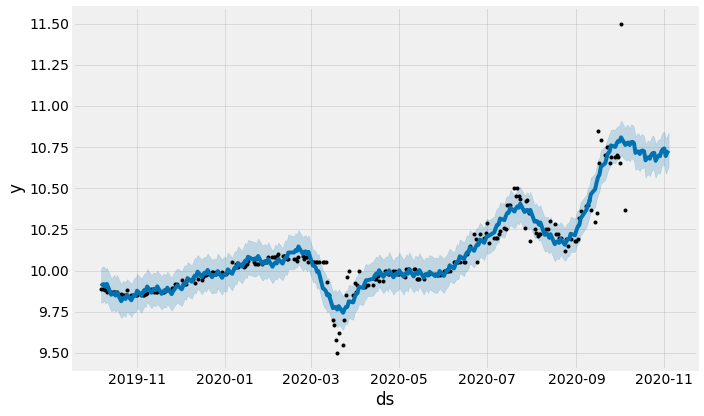

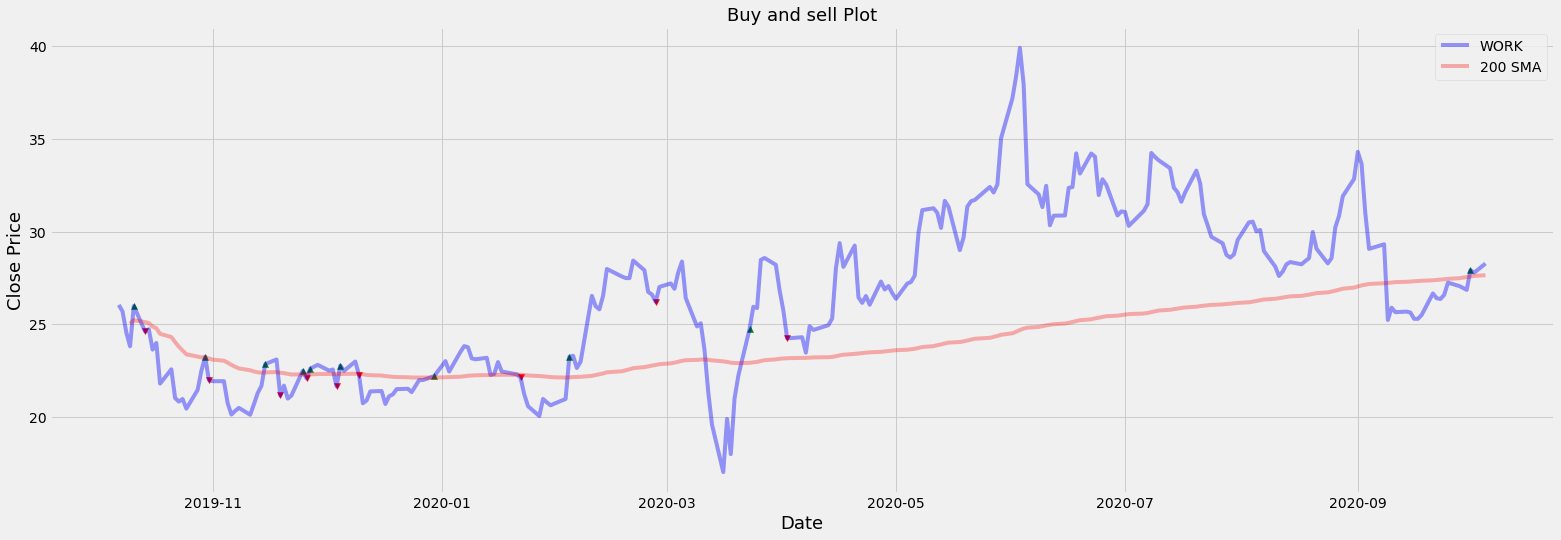

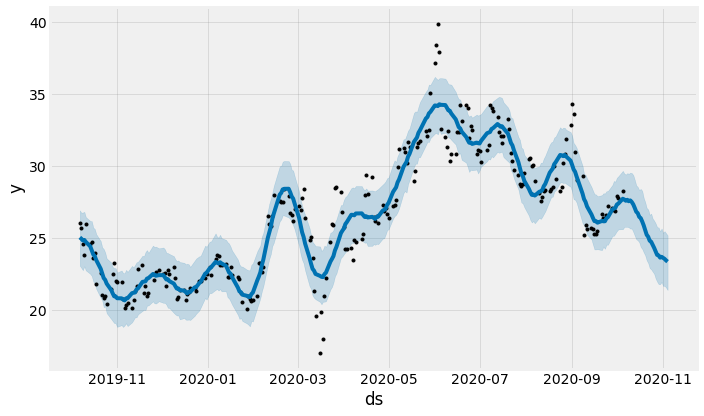

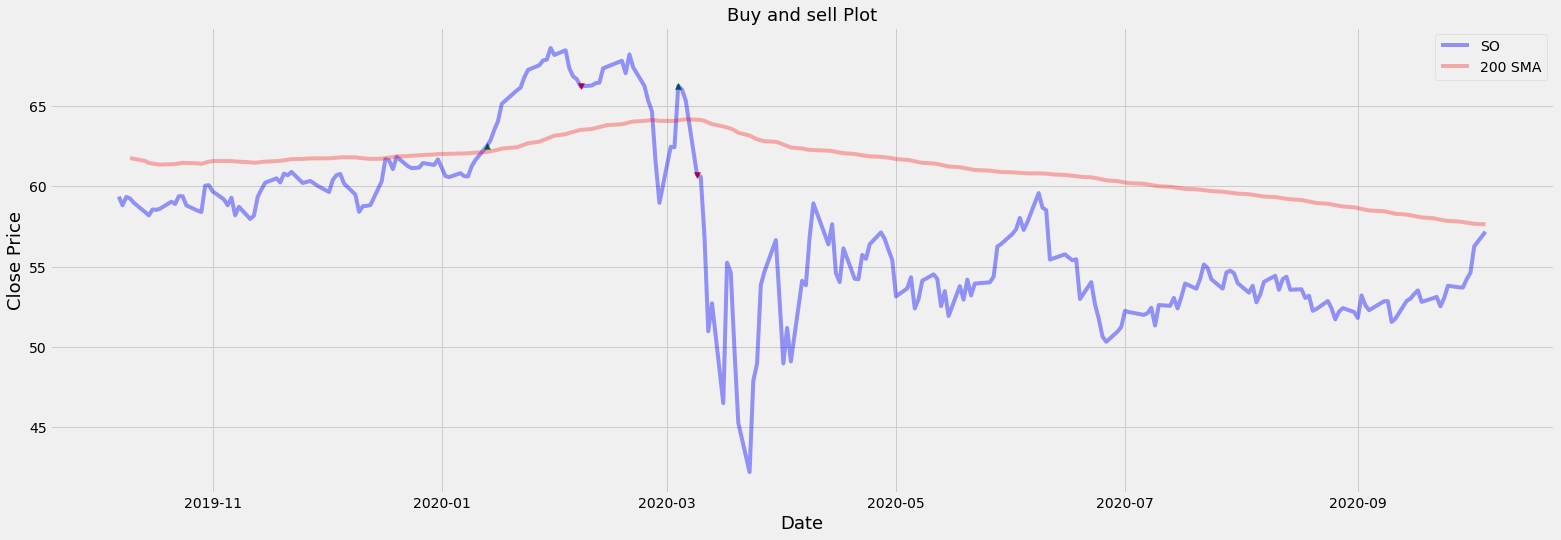

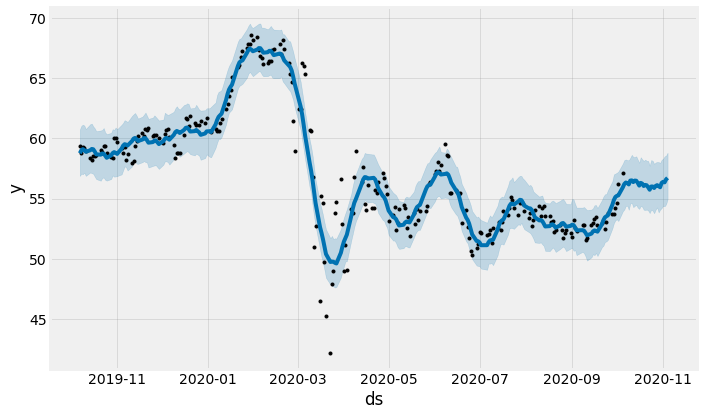

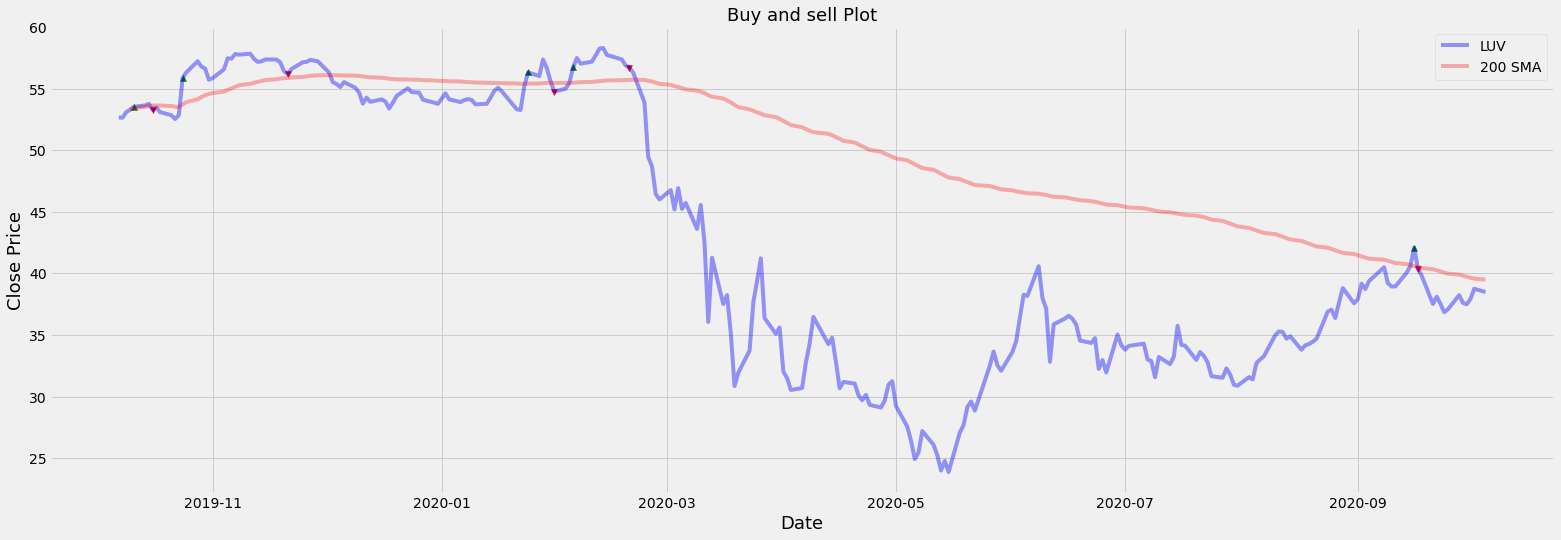

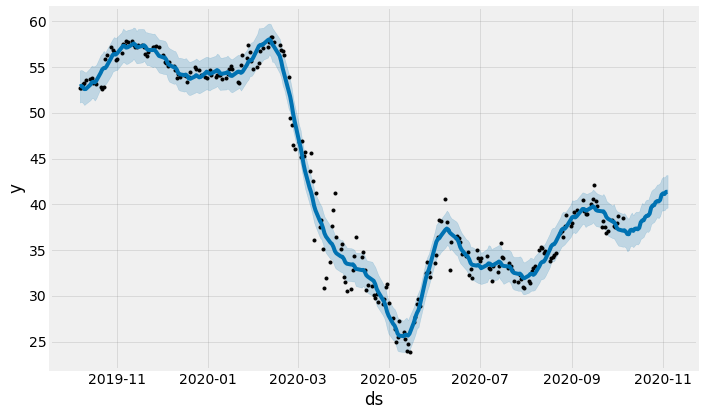

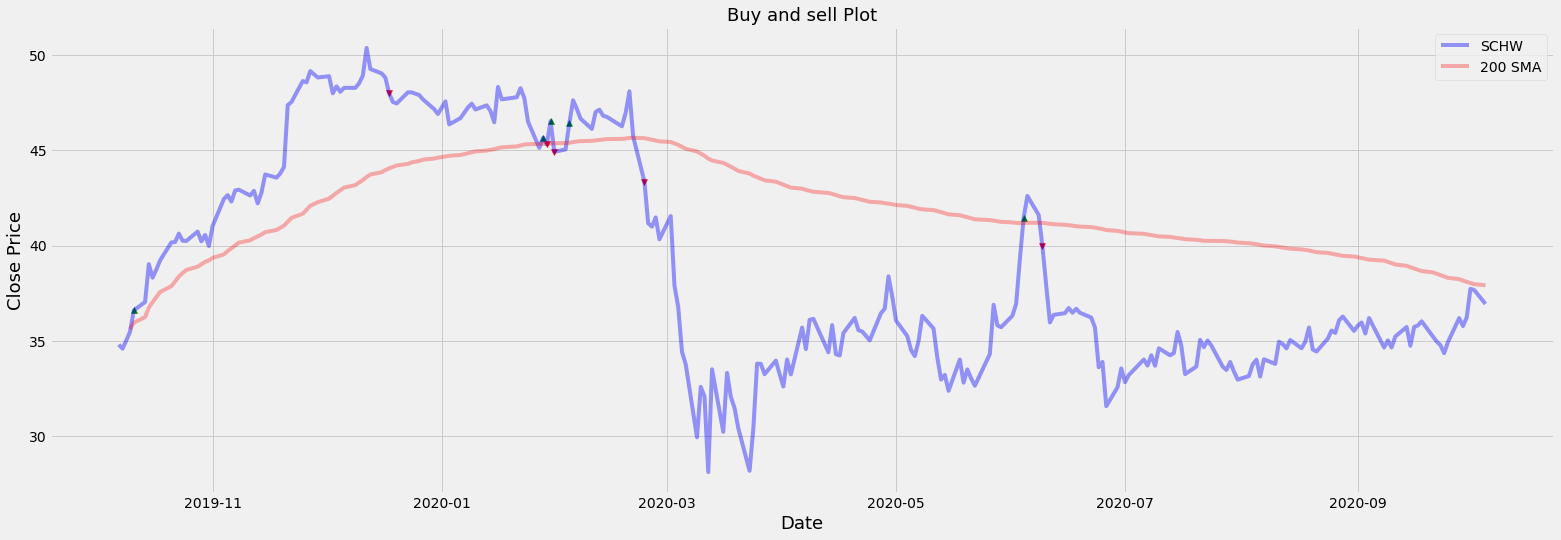

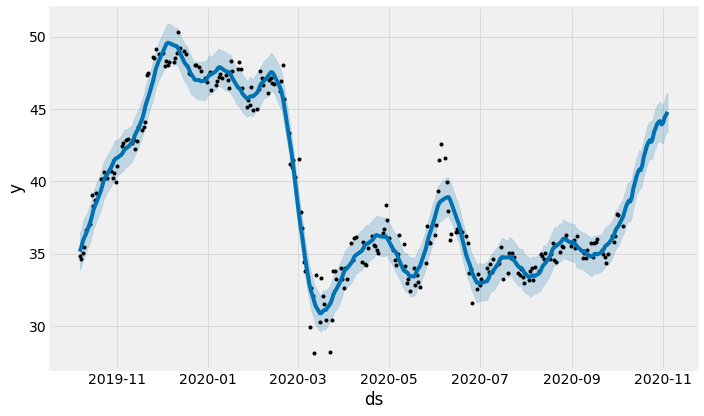

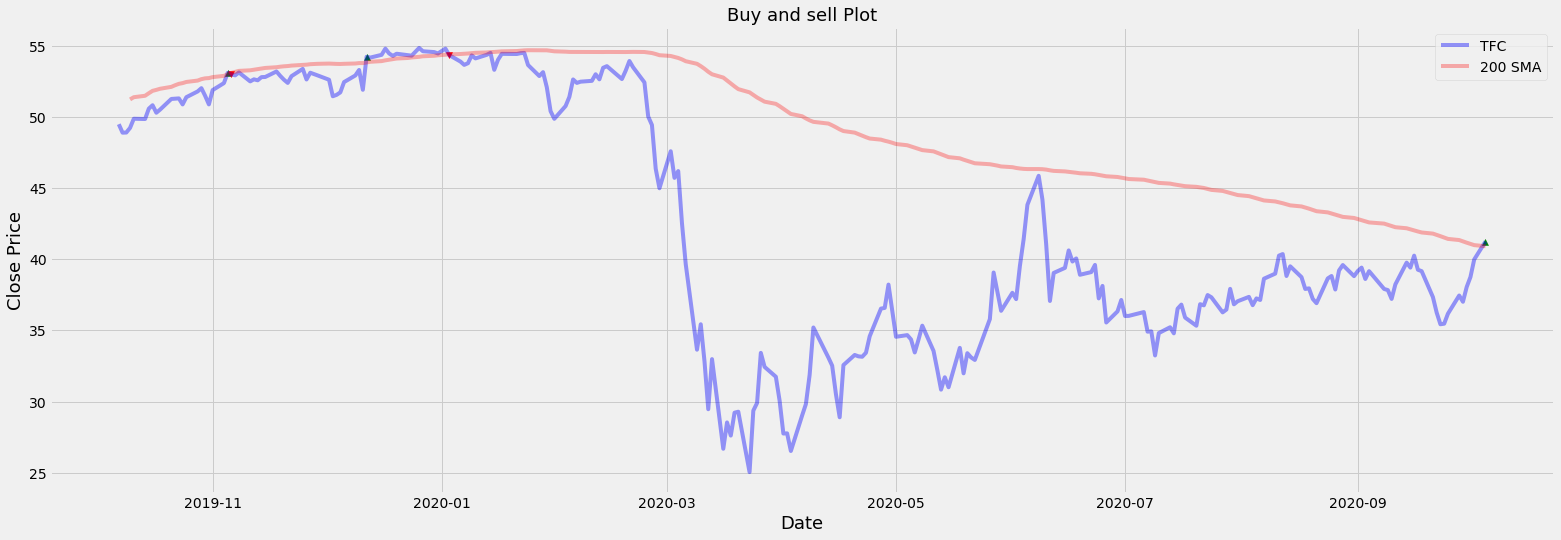

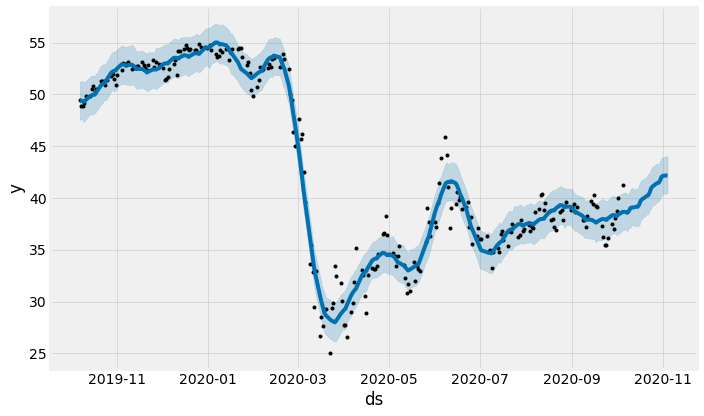

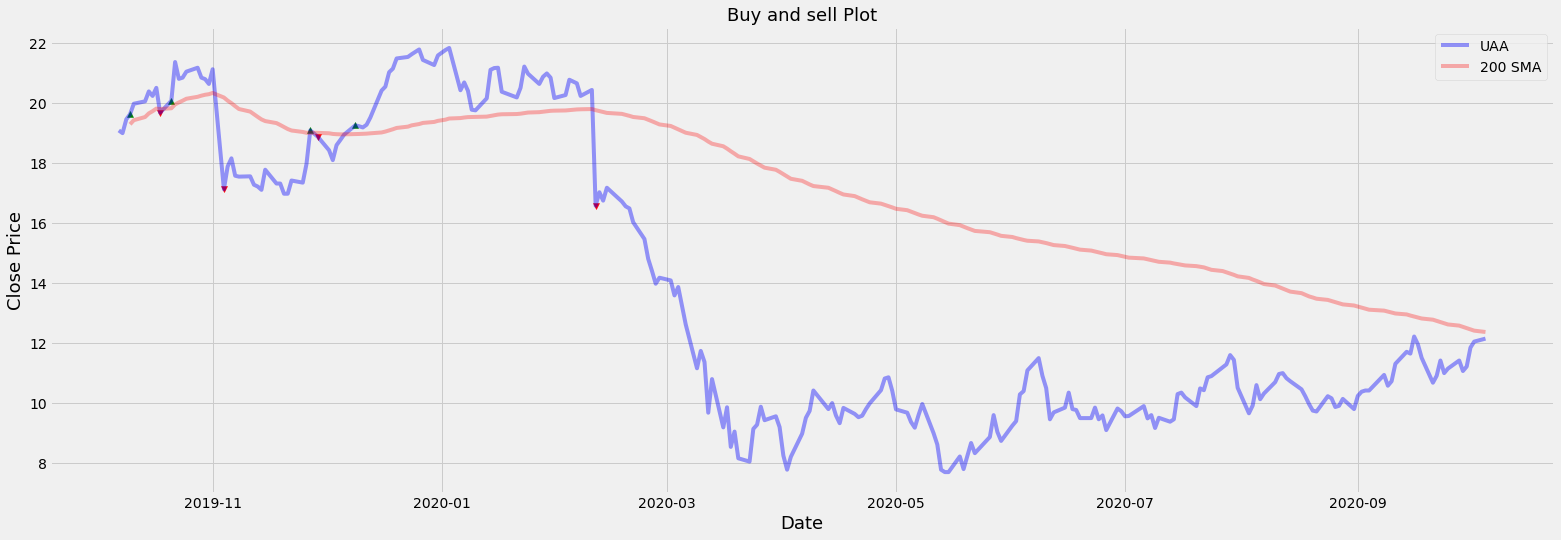

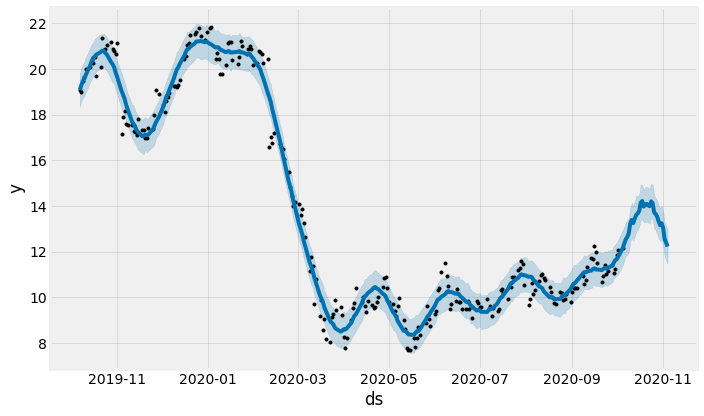

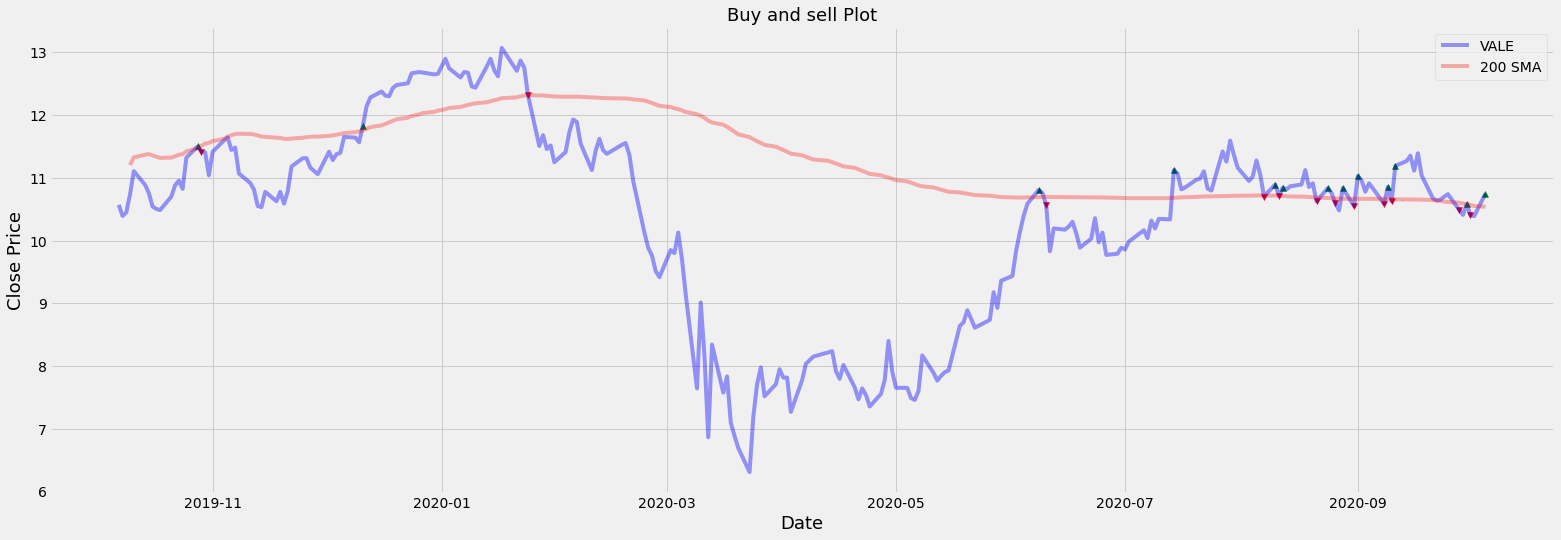

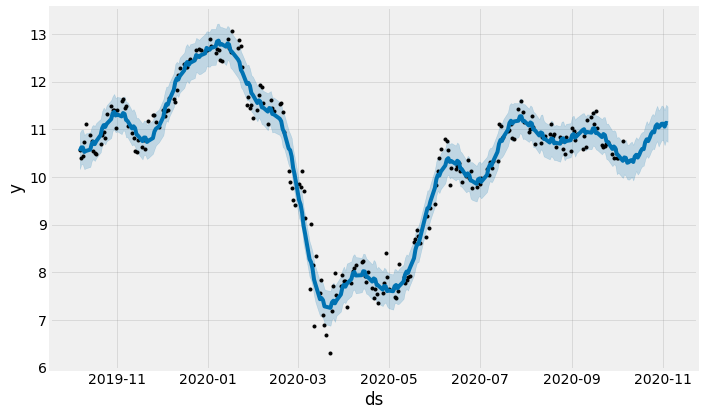

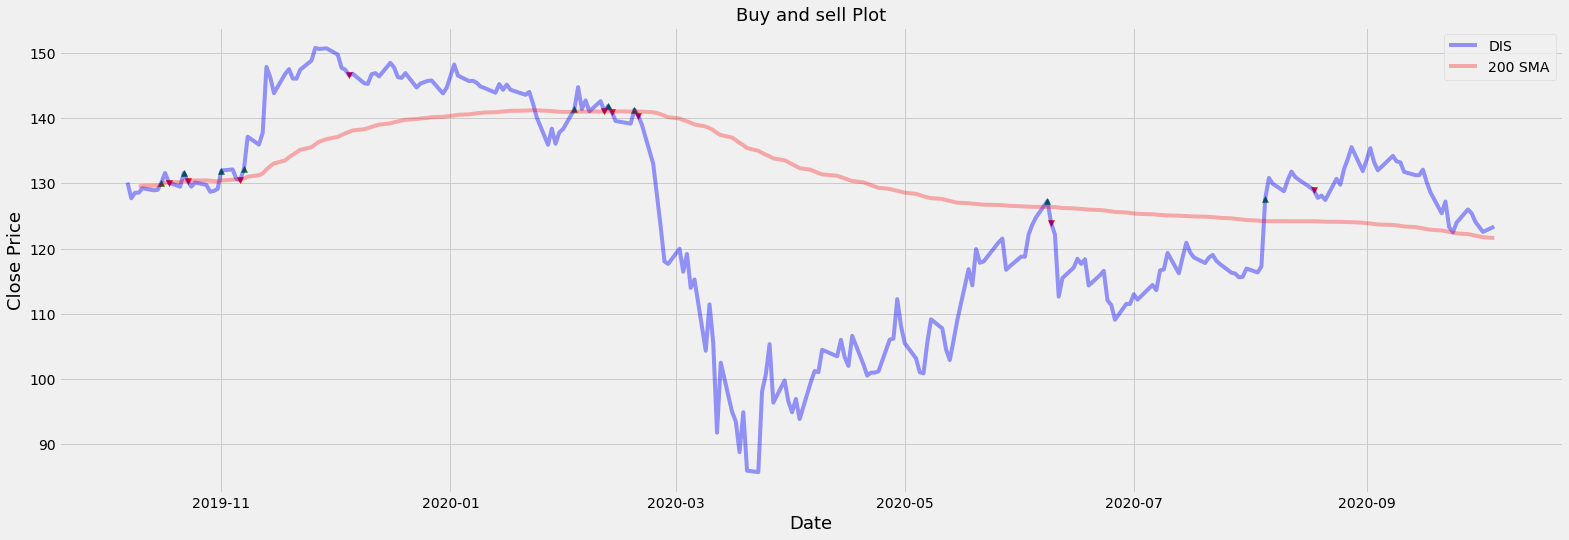

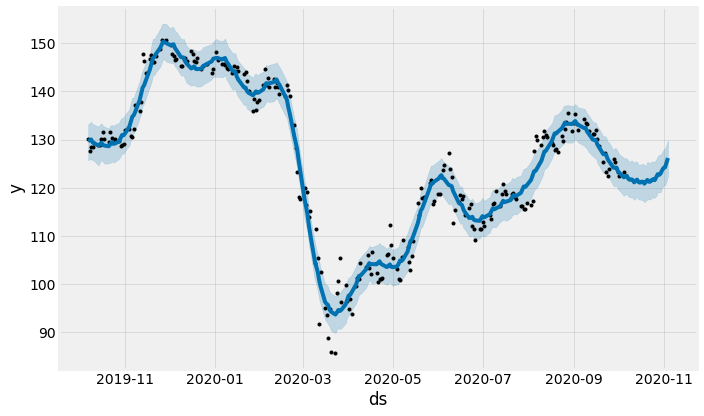

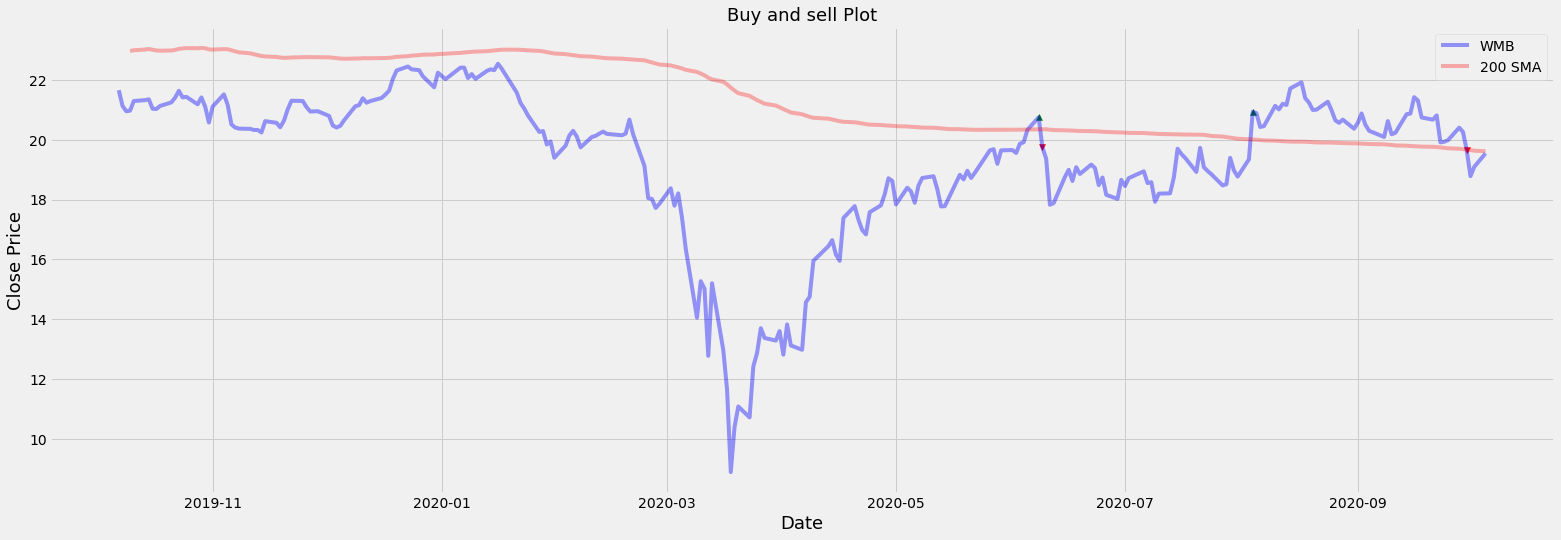

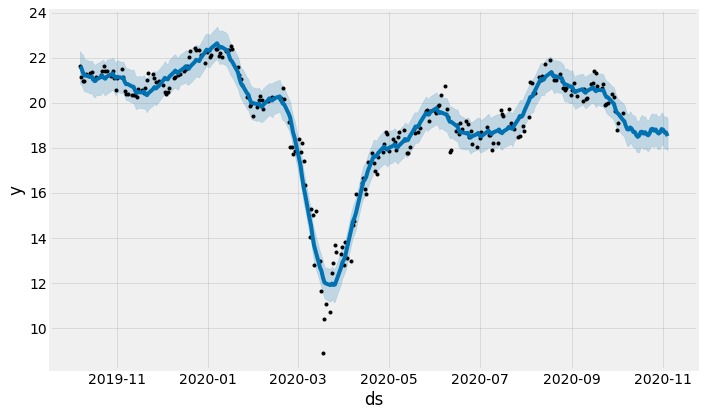

INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


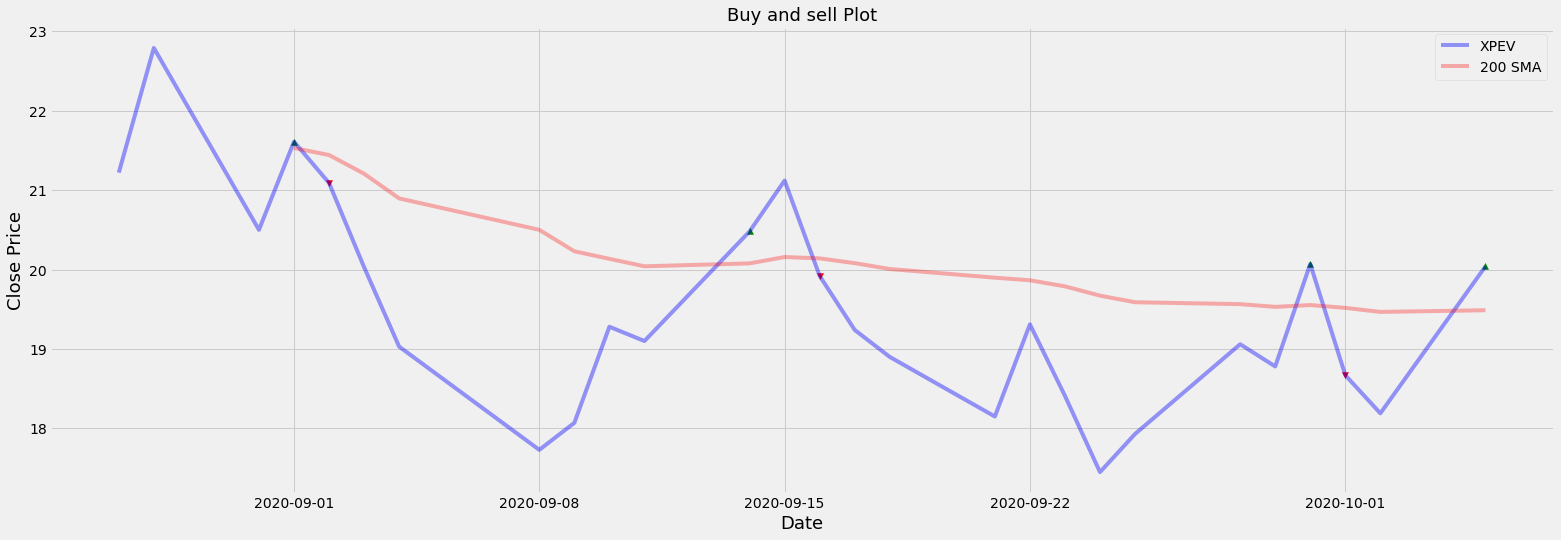

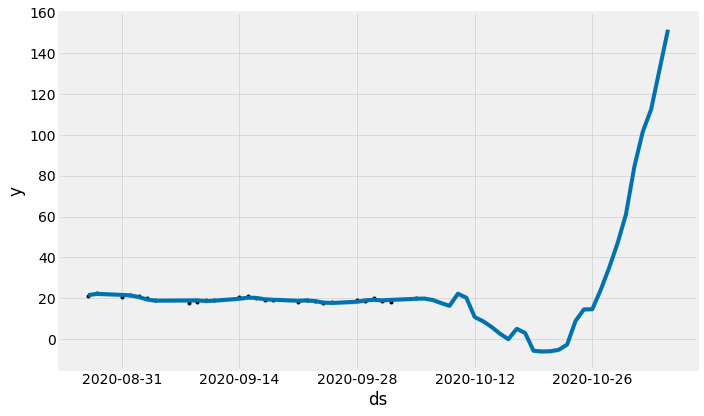

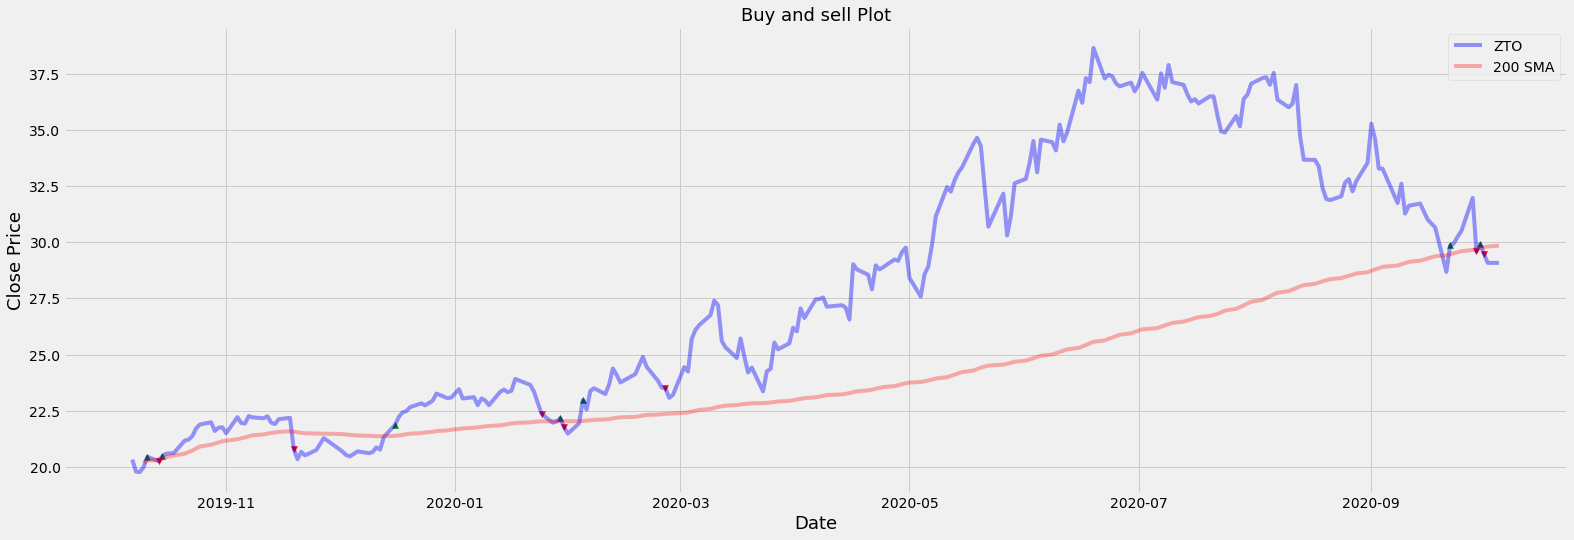

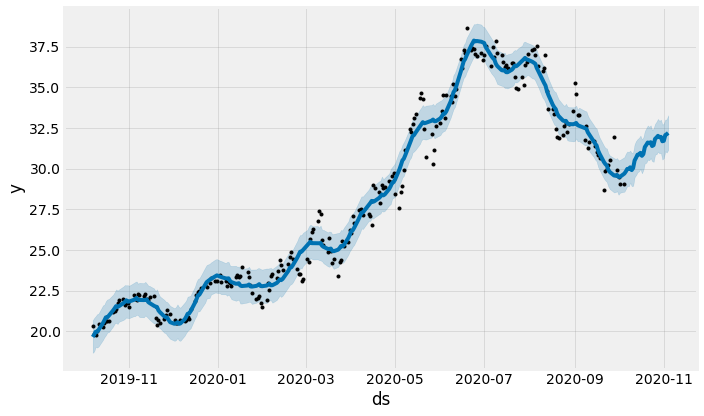

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime as dt
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

today = dt.datetime.now()
start_date = dt.datetime(today.year - 1, today.month, today.day)

def buy_sell_function(data):
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False
  flag_3_negative_days = False
  counter = 0
  wait_for_reset = False

  for i in range(0, len(data)):
    if (data['Adj Close'][i] < data['Adj Close'][i - 1]):
        counter = counter + 1
        if (counter == 4):
            counter = 0
            flag_3_negative_days = True
            wait_for_reset = True
            flag_long = False
    else:
      counter = 0
      flag_3_negative_days = False

    if data['Adj Close'][i] > data['200_SMA'][i] and flag_long == False and wait_for_reset == False:
      buy_list.append(data['Adj Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and (data['Adj Close'][i] < data['200_SMA'][i] or flag_3_negative_days == True):
      sell_list.append(data['Adj Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    elif wait_for_reset == True and data['Adj Close'][i] < data['200_SMA'][i]:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
      wait_for_reset = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  return (buy_list, sell_list)

def fetch_stock_data():
    data = pd.read_csv("nasdaq.txt", index_col=None, header=None)
    data.columns=["Ticker"]
    potential_stocks = []
    error_stocks = []
    
    for x in data.values:
        try:
            df = web.DataReader(x[0], 'yahoo', start=start_date)
            df['200_SMA'] = df.Close.rolling(200, min_periods=4).mean()
            end = len(df['Adj Close'])
            adj_close = df['Adj Close'][end - 1]
            if adj_close > 8.0 and df['Volume'][end - 1] > 3000000.0:
                window = .03 * adj_close
                current_200_sma = df['200_SMA'][end - 1]
                if (current_200_sma < adj_close + window and current_200_sma > adj_close - window):
                    print("adding ticker")
                    print(x[0])
                    print("/////////////")
                    potential_stocks.append(x[0])
                else:
                  pass
        except Exception as e:
            print(e)
            error_stocks.append(x[0])
            print("///////////") 
            
    print("Error Stocks")
    print(error_stocks)
    return potential_stocks

def plot_stocks(stocks):
    for stock in stocks:
        df = web.DataReader(stock.rstrip(), 'yahoo', start=start_date)
        df['200_SMA'] = df.Close.rolling(200, min_periods=4).mean()
        df['Buy'] = get_buy_sell_data(df)[0]
        df['Sell'] = get_buy_sell_data(df)[1]

        # Visually show the stock buy and sell signals
        plt.figure(figsize=(24, 8))
        plt.xlabel('Date', fontsize = 18)
        plt.ylabel('Close Price', fontsize=18)
        plt.title('Buy and sell Plot', fontsize=18)
        plt.plot(df['Adj Close'], label=stock, color='blue', alpha=.4)
        plt.plot(df['200_SMA'], label='200 SMA', color='red', alpha=.3)
        plt.scatter(df.index, df['Buy'], color='green', marker='^', alpha=1)
        plt.scatter(df.index, df['Sell'], color='red', marker='v', alpha= 1)
        plt.legend()

        model = Prophet(daily_seasonality=True,yearly_seasonality=True)
        df = df.reset_index()
        df[['ds','y']] = df[['Date', 'Adj Close']]
        model.fit(df)
        future = model.make_future_dataframe(periods=30)
        forecast = model.predict(future)
        model.plot(forecast)
        plt.show()

def get_buy_sell_data(data):
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False
  flag_3_negative_days = False
  counter = 0
  wait_for_reset = False

  for i in range(0, len(data)):
    if (data['Close'][i] < data['Close'][i - 1]):
        counter = counter + 1
        if (counter == 4):
            counter = 0
            flag_3_negative_days = True
            wait_for_reset = True
    else:
      counter = 0
      flag_3_negative_days = False

    if data['Adj Close'][i] > data['200_SMA'][i] and flag_long == False and wait_for_reset == False:
      buy_list.append(data['Adj Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and (data['Adj Close'][i] < data['200_SMA'][i] or flag_3_negative_days == True):
      sell_list.append(data['Adj Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    elif wait_for_reset == True and data['Adj Close'][i] < data['200_SMA'][i]:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
      wait_for_reset = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  return (buy_list, sell_list)

potential_stocks = fetch_stock_data()
print(potential_stocks)
plot_stocks(potential_stocks)

   
  